# Wolt <br> Data Analysis Assignment <br> S M Rifaiya Abrar

Hello! this is my notebook. Everything is divided into six sections which is under each drop down.

# **DATA PRE PROCESSING**

First Lets import some libraries and load the dataset, also see how it is structured. Opened the dataset in excel so I have a pretty good idea

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

# Load the dataset
df = pd.read_csv("dataset_for_datascience_assignment.csv")

In [2]:
# Display the first 5 rows:
print(df.head())

         REGISTRATION_DATE REGISTRATION_COUNTRY  PURCHASE_COUNT  \
0  2019-09-01 00:00:00.000                  DNK               0   
1  2019-09-01 00:00:00.000                  FIN               1   
2  2019-09-01 00:00:00.000                  DNK              19   
3  2019-09-01 00:00:00.000                  FIN               0   
4  2019-09-01 00:00:00.000                  GRC               0   

   PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY       FIRST_PURCHASE_DAY  \
0                      NaN                      NaN                      NaN   
1                      1.0                      0.0  2020-09-02 00:00:00.000   
2                     19.0                      0.0  2019-12-10 00:00:00.000   
3                      NaN                      NaN                      NaN   
4                      NaN                      NaN                      NaN   

         LAST_PURCHASE_DAY  USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  \
0                      NaN        1    

Lets Convert the Date time to datetime format

In [2]:
# Convert date columns to datetime format
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

Lets make another dataframe where there are only active users

In [3]:
# Removing rows where PURCHASE_COUNT is 0
df_cleaned = df[df["PURCHASE_COUNT"] > 0]

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Print summary before and after cleaning
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (21983, 30)
Cleaned dataset shape: (12028, 30)


In [8]:
# Set display options to show full content
pd.set_option('display.max_colwidth', None)

# Print the 'PURCHASE_COUNT_BY_STORE_TYPE' column
print(df_cleaned.head())

   REGISTRATION_DATE REGISTRATION_COUNTRY  PURCHASE_COUNT  \
1         2019-09-01                  FIN               1   
2         2019-09-01                  DNK              19   
7         2019-09-01                  FIN               1   
12        2019-09-01                  FIN              19   
13        2019-09-01                  FIN               2   

    PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY FIRST_PURCHASE_DAY  \
1                       1.0                      0.0         2020-09-02   
2                      19.0                      0.0         2019-12-10   
7                       1.0                      0.0         2020-10-14   
12                     19.0                      0.0         2020-04-18   
13                      2.0                      0.0         2020-08-21   

   LAST_PURCHASE_DAY  USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  \
1         2020-09-02        2                  0.0              1.0   
2         2020-05-25        3           

Inserting Data to Late night purchase with most common hour of purchase

In [4]:
# Create a copy of the DataFrame
new_df = df.copy()
new_df_cleaned = df_cleaned.copy()

# Update LATE_NIGHT_PURCHASES based on MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE
new_df['LATE_NIGHT_PURCHASES'] = new_df.apply(
    lambda row: row['PURCHASE_COUNT'] if 0 <= row['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'] <= 4 else row['LATE_NIGHT_PURCHASES'], axis=1
)
new_df_cleaned['LATE_NIGHT_PURCHASES'] = new_df.apply(
    lambda row: row['PURCHASE_COUNT'] if 0 <= row['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'] <= 4 else row['LATE_NIGHT_PURCHASES'], axis=1
)


Extracting purchase count by store column to a readable format

In [5]:
# Extract PURCHASE_COUNT_BY_STORE_TYPE as separate columns
def extract_store_types(row):
    try:
        store_data = json.loads(row)
        return store_data
    except (TypeError, json.JSONDecodeError):
        return {}

store_type_df = pd.json_normalize(df_cleaned['PURCHASE_COUNT_BY_STORE_TYPE'].apply(extract_store_types))

# Combine the extracted store type data with the original DataFrame
df_combined = pd.concat([df_cleaned, store_type_df], axis=1)

Function to extract the top restaurant type  

In [6]:
# Function to extract the top restaurant type
def extract_top_restaurant(row):
    try:
        restaurant_data = json.loads(row)  # Load JSON string as dictionary
        # Check if restaurant_data is a dictionary
        if isinstance(restaurant_data, dict):
            # Returns key if the value is >0, if not returns None
            top_restaurant = next((k for k, v in restaurant_data.items() if v > 0), None)
            return top_restaurant
        else:
            # If it's a list or other type, return the first element if it exists
            if len(restaurant_data) > 0:
                return restaurant_data[0]
            else:
                return None
    except (TypeError, json.JSONDecodeError):
        return None

In [7]:
# Define the top countries
top_countries = ['FIN', 'DNK', 'GRC']

# Create a new column 'SIMPLIFIED_COUNTRY'
df['SIMPLIFIED_COUNTRY'] = df['REGISTRATION_COUNTRY'].apply(lambda country: country if country in top_countries else 'Other')

# Print value counts to verify
print(df['SIMPLIFIED_COUNTRY'].value_counts())

# Create a new column 'SIMPLIFIED_COUNTRY'
df_combined['SIMPLIFIED_COUNTRY'] = df_combined['REGISTRATION_COUNTRY'].apply(lambda country: country if country in top_countries else 'Other')


print(df_combined['SIMPLIFIED_COUNTRY'].value_counts())

# Create a new column 'SIMPLIFIED_COUNTRY'
df_cleaned['SIMPLIFIED_COUNTRY'] = df_cleaned['REGISTRATION_COUNTRY'].apply(lambda country: country if country in top_countries else 'Other')

# Print value counts to verify
print(df_cleaned['SIMPLIFIED_COUNTRY'].value_counts())

# Create a new column 'SIMPLIFIED_COUNTRY'
new_df_cleaned['SIMPLIFIED_COUNTRY'] = new_df_cleaned['REGISTRATION_COUNTRY'].apply(lambda country: country if country in top_countries else 'Other')

# Print value counts to verify
print(new_df_cleaned['SIMPLIFIED_COUNTRY'].value_counts())

SIMPLIFIED_COUNTRY
FIN      10277
DNK       8081
GRC       3042
Other      583
Name: count, dtype: int64
SIMPLIFIED_COUNTRY
Other    5551
FIN      5451
DNK      4985
GRC      1532
Name: count, dtype: int64
SIMPLIFIED_COUNTRY
FIN      5451
DNK      4985
GRC      1532
Other      60
Name: count, dtype: int64
SIMPLIFIED_COUNTRY
FIN      5451
DNK      4985
GRC      1532
Other      60
Name: count, dtype: int64


<ipython-input-7-d2c96348bc69>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SIMPLIFIED_COUNTRY'] = df_cleaned['REGISTRATION_COUNTRY'].apply(lambda country: country if country in top_countries else 'Other')


# **Overall Usage Summary - User Distribution by country -  Active, inactive, Retention, Churn**

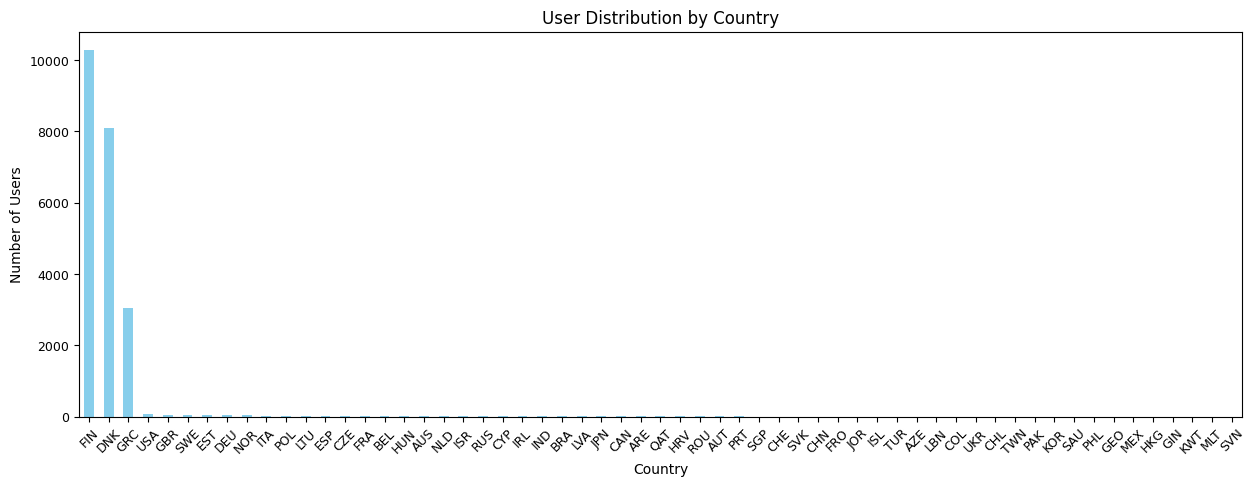

In [20]:
# Country-wise User Distribution
country_counts = df['REGISTRATION_COUNTRY'].value_counts()
country_counts.plot(kind='bar', color='skyblue', figsize=(15, 5), fontsize=9)
plt.title('User Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

Lets simply it as other than the top 3, all have very little value.

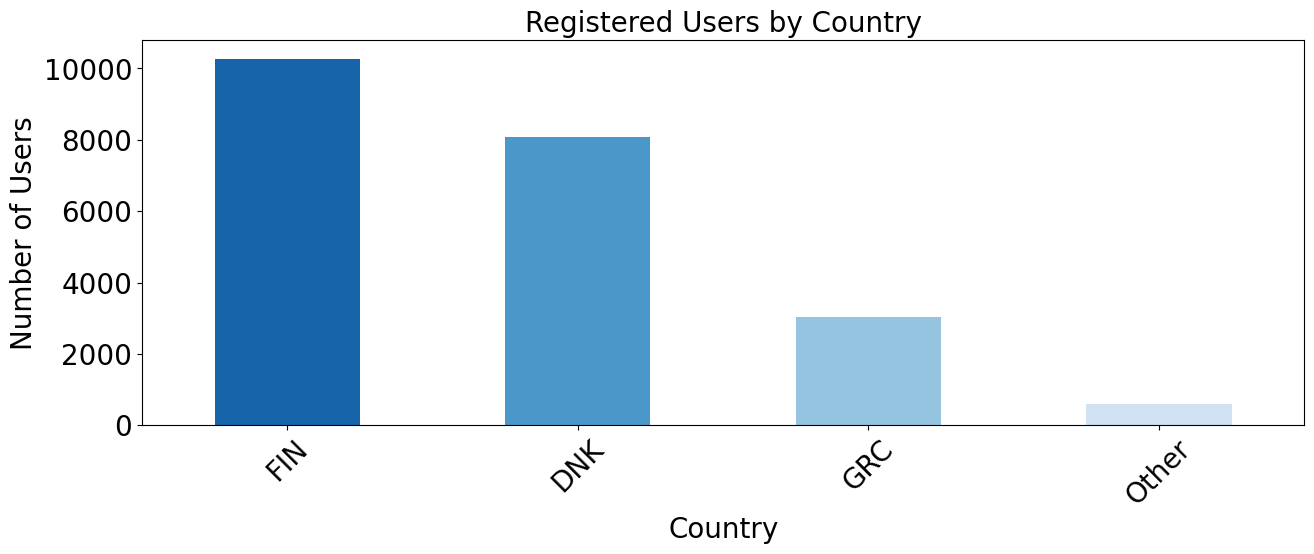

In [186]:
# Country-wise User Distribution
cmap = sns.color_palette("Blues", n_colors=4)
country_counts = df['SIMPLIFIED_COUNTRY'].value_counts()
country_counts.plot(kind='bar', color=cmap[::-1], figsize=(15, 5), fontsize=20)
plt.title('Registered Users by Country', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number of Users', fontsize=20)
plt.xticks(rotation=45)
plt.show()

Inactive User Users per Country

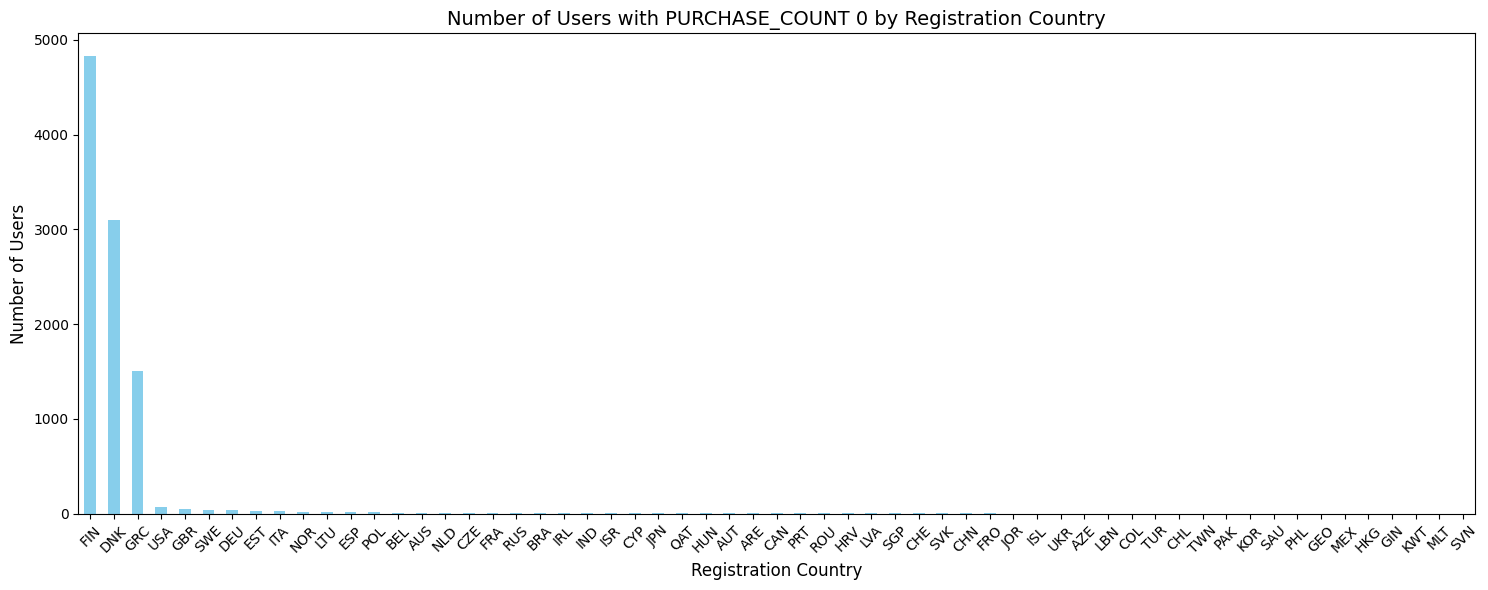

In [187]:
inactive_users = df[df['PURCHASE_COUNT'] == 0]

# Group by REGISTRATION_COUNTRY and count users
inactive_users_by_country = inactive_users['REGISTRATION_COUNTRY'].value_counts()

# Plot the data
plt.figure(figsize=(15, 6))
inactive_users_by_country.plot(kind='bar', color='skyblue')
plt.title('Number of Users with PURCHASE_COUNT 0 by Registration Country', fontsize=14)
plt.xlabel('Registration Country', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Simplied

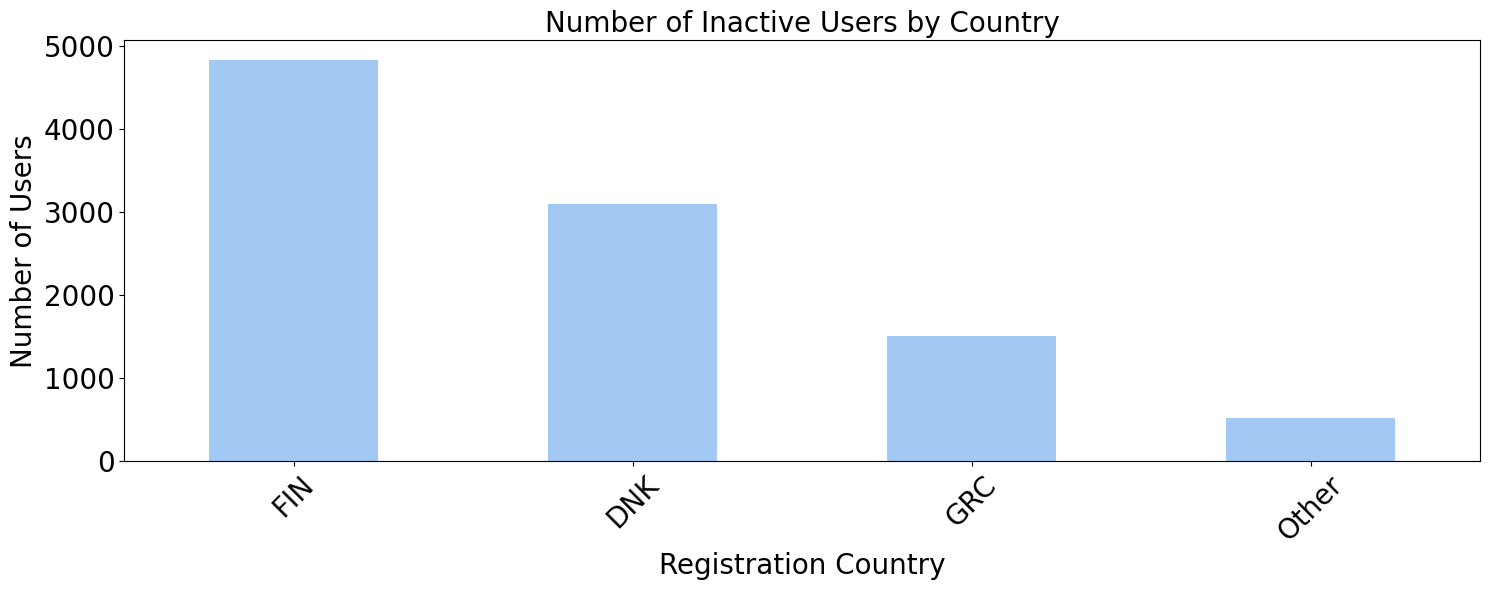

In [188]:
from os import name
inactive_users = df[df['PURCHASE_COUNT'] == 0]

# Group by REGISTRATION_COUNTRY and count users
inactive_users_by_country = inactive_users['SIMPLIFIED_COUNTRY'].value_counts()
cmap = sns.color_palette("pastel", n_colors=1)
# Plot the data
plt.figure(figsize=(15, 6))
inactive_users_by_country.plot(kind='bar', color=cmap, fontsize=20)
plt.title('Number of Inactive Users by Country', fontsize=20)
plt.xlabel('Registration Country', fontsize=20)
plt.ylabel('Number of Users', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.tight_layout()
plt.show()

Active Users Per Country

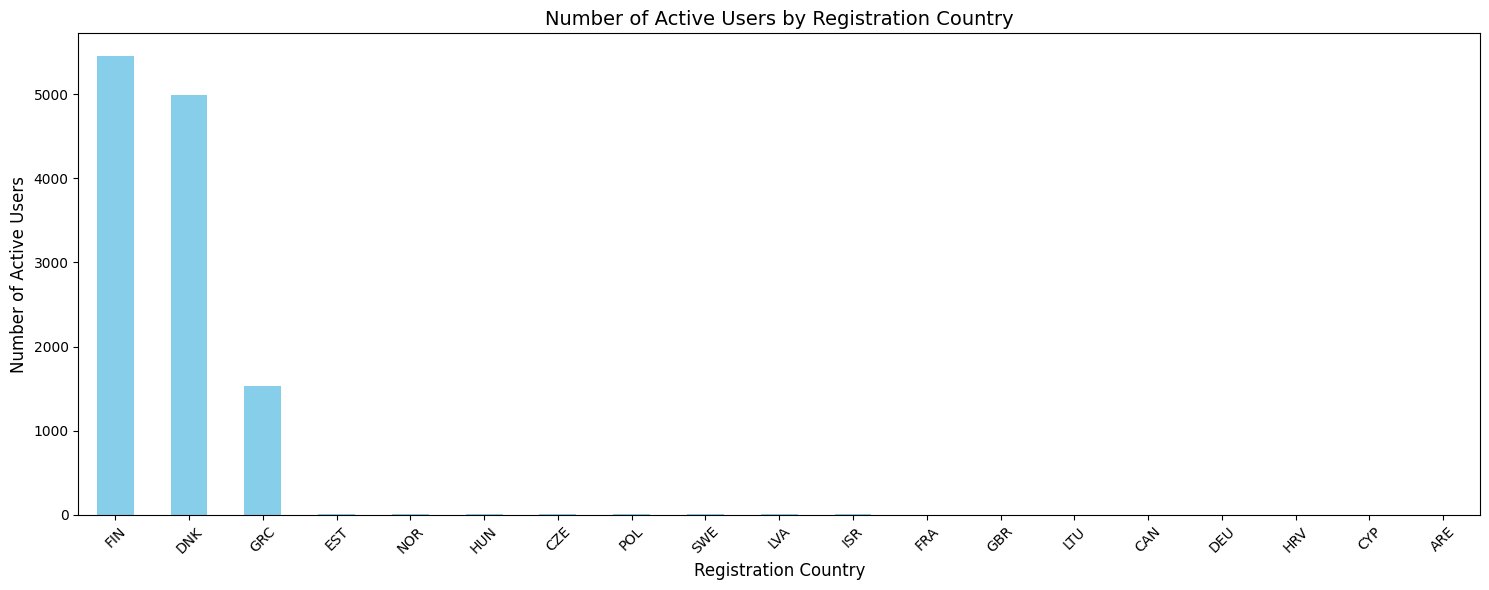

In [189]:
# Filter data for users with PURCHASE_COUNT > 0 (active users)
active_users = df[df['PURCHASE_COUNT'] > 0]

# Group by REGISTRATION_COUNTRY and count active users
active_users_by_country = active_users['REGISTRATION_COUNTRY'].value_counts()

# Plot the data
plt.figure(figsize=(15, 6))
active_users_by_country.plot(kind='bar', color='skyblue')
plt.title('Number of Active Users by Registration Country', fontsize=14)
plt.xlabel('Registration Country', fontsize=12)
plt.ylabel('Number of Active Users', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Simplified

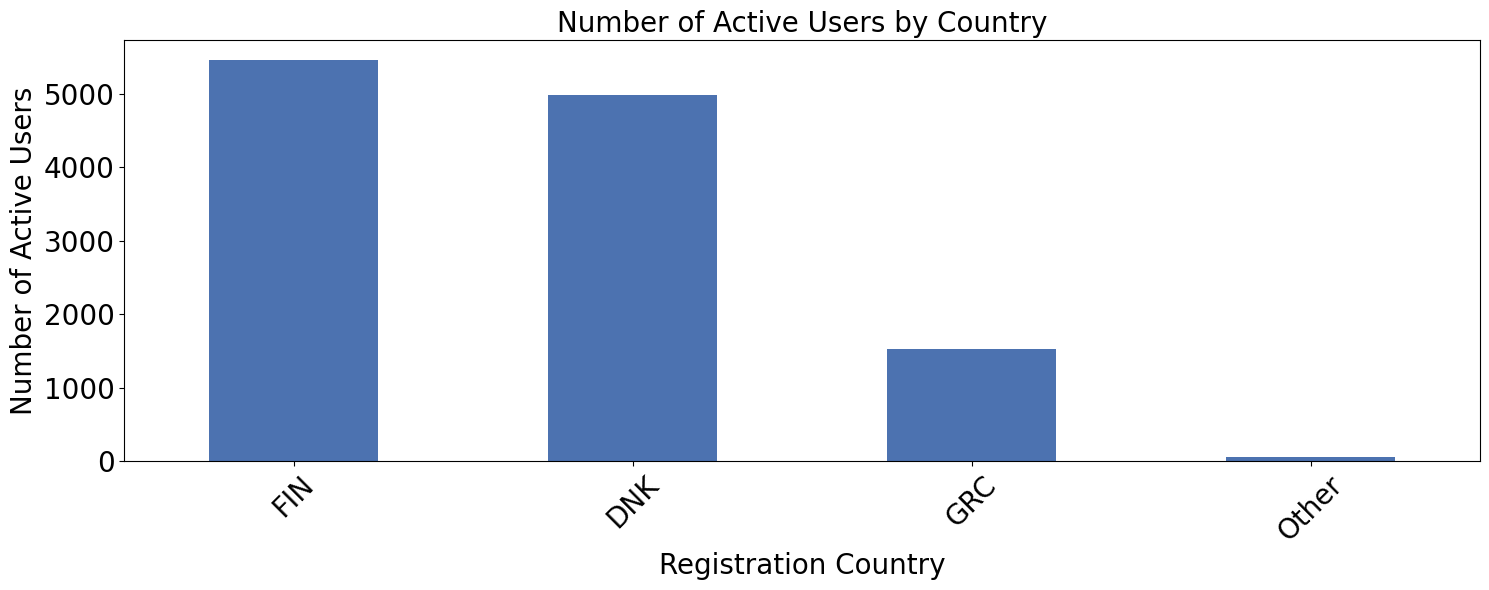

In [190]:
# Filter data for users with PURCHASE_COUNT > 0 (active users)
active_users = df[df['PURCHASE_COUNT'] > 0]

# Group by REGISTRATION_COUNTRY and count active users
active_users_by_country = active_users['SIMPLIFIED_COUNTRY'].value_counts()

cmap = sns.color_palette("deep", n_colors=1)
# Plot the data
plt.figure(figsize=(15, 6))
active_users_by_country.plot(kind='bar', color=cmap, fontsize=20)
plt.title('Number of Active Users by Country', fontsize=20)
plt.xlabel('Registration Country', fontsize=20)
plt.ylabel('Number of Active Users', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.tight_layout()
plt.show()

Conversion Rate from most to least

In [109]:
# Calculate total users per country
total_users_by_country = df['REGISTRATION_COUNTRY'].value_counts()

# Calculate active users (purchase_count > 0) per country
active_users_by_country = df[df['PURCHASE_COUNT'] > 0]['REGISTRATION_COUNTRY'].value_counts()

# Calculate conversion rate per country
# Fill NaN values with 0 for countries with no active users
conversion_rate_by_country = (active_users_by_country / total_users_by_country).fillna(0) * 100

# Print conversion rates
print("Conversion Rates by Country:")
print(conversion_rate_by_country.sort_values(ascending=False))  # Sort for better readability

Conversion Rates by Country:
REGISTRATION_COUNTRY
DNK    61.687910
FIN    53.040771
GRC    50.361604
HUN    45.454545
LVA    42.857143
NOR    38.235294
ISR    33.333333
EST    29.545455
CZE    28.571429
HRV    20.000000
FRA    18.181818
POL    17.391304
ARE    16.666667
CAN    16.666667
CYP    14.285714
LTU     9.090909
SWE     8.888889
GBR     3.703704
DEU     2.564103
AUS     0.000000
CHN     0.000000
COL     0.000000
CHE     0.000000
BRA     0.000000
BEL     0.000000
AZE     0.000000
AUT     0.000000
HKG     0.000000
FRO     0.000000
GEO     0.000000
GIN     0.000000
ESP     0.000000
CHL     0.000000
ITA     0.000000
IND     0.000000
KOR     0.000000
JPN     0.000000
JOR     0.000000
LBN     0.000000
KWT     0.000000
MEX     0.000000
IRL     0.000000
ISL     0.000000
NLD     0.000000
MLT     0.000000
PHL     0.000000
PAK     0.000000
QAT     0.000000
ROU     0.000000
RUS     0.000000
PRT     0.000000
SAU     0.000000
SGP     0.000000
SVK     0.000000
SVN     0.000000
TUR     0.00000

Conversion Rate with User amounts

In [110]:


# Calculate total users per country
total_users_by_country = df['REGISTRATION_COUNTRY'].value_counts()

# Calculate inactive users (purchase_count = 0) per country
inactive_users_by_country = df[df['PURCHASE_COUNT'] == 0]['REGISTRATION_COUNTRY'].value_counts()

# Calculate conversion rate per country
conversion_rate_by_country = (total_users_by_country - inactive_users_by_country) / total_users_by_country * 100

# Find countries with the least conversion rate
least_conversion_countries = conversion_rate_by_country.sort_values()

# Print the results
for country in least_conversion_countries.index:
    print(f"Country: {country}")
    print(f"  Conversion Rate: {conversion_rate_by_country[country]:.2f}%")
    print(f"  Inactive Users: {inactive_users_by_country.get(country, 0)}")
    print(f"  Total Users: {total_users_by_country[country]}")
    print("-" * 20)


Country: AUS
  Conversion Rate: 0.00%
  Inactive Users: 11
  Total Users: 11
--------------------
Country: AUT
  Conversion Rate: 0.00%
  Inactive Users: 5
  Total Users: 5
--------------------
Country: AZE
  Conversion Rate: 0.00%
  Inactive Users: 2
  Total Users: 2
--------------------
Country: BEL
  Conversion Rate: 0.00%
  Inactive Users: 11
  Total Users: 11
--------------------
Country: CHE
  Conversion Rate: 0.00%
  Inactive Users: 4
  Total Users: 4
--------------------
Country: BRA
  Conversion Rate: 0.00%
  Inactive Users: 7
  Total Users: 7
--------------------
Country: CHN
  Conversion Rate: 0.00%
  Inactive Users: 3
  Total Users: 3
--------------------
Country: CHL
  Conversion Rate: 0.00%
  Inactive Users: 2
  Total Users: 2
--------------------
Country: COL
  Conversion Rate: 0.00%
  Inactive Users: 2
  Total Users: 2
--------------------
Country: ESP
  Conversion Rate: 0.00%
  Inactive Users: 19
  Total Users: 19
--------------------
Country: ISL
  Conversion Rate: 0.

In [191]:
#  Conversion Rate

registered_users = len(df)
converted_users = len(df[df['PURCHASE_COUNT'] > 0])
conversion_rate = (converted_users / registered_users) * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 54.72%


In [192]:
# Customer Retention Rate
total_customers = len(df[df['PURCHASE_COUNT'] > 0])
retained_customers = len(df[df['PURCHASE_COUNT'] > 1])
print(total_customers)
print(retained_customers)
retention_rate = (retained_customers / total_customers) * 100

print(f"Customer Retention Rate: {retention_rate:.2f}%")

12028
7849
Customer Retention Rate: 65.26%


In [193]:
# Churn Rate
# Define function to get user activity
def is_active(count):
    return count > 0

# Create active column
df['IS_ACTIVE'] = df['PURCHASE_COUNT'].apply(is_active)

# Calculate the total number of active users
total_active_users = df['IS_ACTIVE'].sum()

# Calculate the number of churned users (purchase_count == 1)
churned_users = df[df['PURCHASE_COUNT'] == 1].shape[0]

# Calculate the total churn rate
total_churn_rate = (churned_users / total_active_users) * 100 if total_active_users > 0 else 0

# Print the total churn rate
print(f"Total Churn Rate among all active users: {total_churn_rate:.2f}%")

Total Churn Rate among all active users: 34.74%


In [60]:
# Define function to get user activity
def is_active(count):
    return count > 0

# Create active column
df_no_nan['IS_ACTIVE'] = df_no_nan['PURCHASE_COUNT'].apply(is_active)

# Group by SIMPLIFIED_COUNTRY and calculate metrics
country_user_status = df_no_nan.groupby('SIMPLIFIED_COUNTRY').agg(
    Total=('USER_ID', 'count'),
    Active=('IS_ACTIVE', 'sum')
)

# Calculate the active percentage
country_user_status['Active %'] = (country_user_status['Active'] / country_user_status['Total']) * 100

# Join user counts
country_user_counts = df_no_nan.groupby('SIMPLIFIED_COUNTRY').agg(
    Retained=('PURCHASE_COUNT', lambda x: (x > 1).sum()),
    Churned=('PURCHASE_COUNT', lambda x: (x == 1).sum())
)

country_user_status = country_user_status.join(country_user_counts)

# Calculate percentages relative to active users
country_user_status['Retained %'] = (country_user_status['Retained'] / country_user_status['Active']) * 100
country_user_status['Churn %'] = (country_user_status['Churned'] / country_user_status['Active']) * 100

# Select relevant columns for the output table
output_table = country_user_status[['Active %', 'Active', 'Retained %', 'Churn %']]

# Print the table
print("User Engagement Metrics (Based on Active Users) by Country:")
print(output_table)

User Engagement Metrics (Based on Active Users) by Country:
                     Active %  Active  Retained %    Churn %
SIMPLIFIED_COUNTRY                                          
DNK                 61.848635    4985   65.496489  34.503511
FIN                 53.201874    5450   65.724771  34.275229
GRC                 50.527704    1532   62.532637  37.467363
Other               10.452962      60   73.333333  26.666667


**Zero Conversion Countries:** Identify and address why many countries show zero purchase conversion. <Br>

**Untapped Potential:** Target countries with high registration but low conversion; offer targeted campaigns and incentives. <br>

**Finland’s Challenge:** High registration but equal active/inactive users points to a problem with onboarding or value proposition. Need user research and tailored interventions.<br>

**Denmark's Success:** Higher active users. Investigate and apply Denmark’s strategies (marketing, localization) to other markets.


# **Spending Behavior**

Average Order Value by Country - Finding out which country has more order value in average

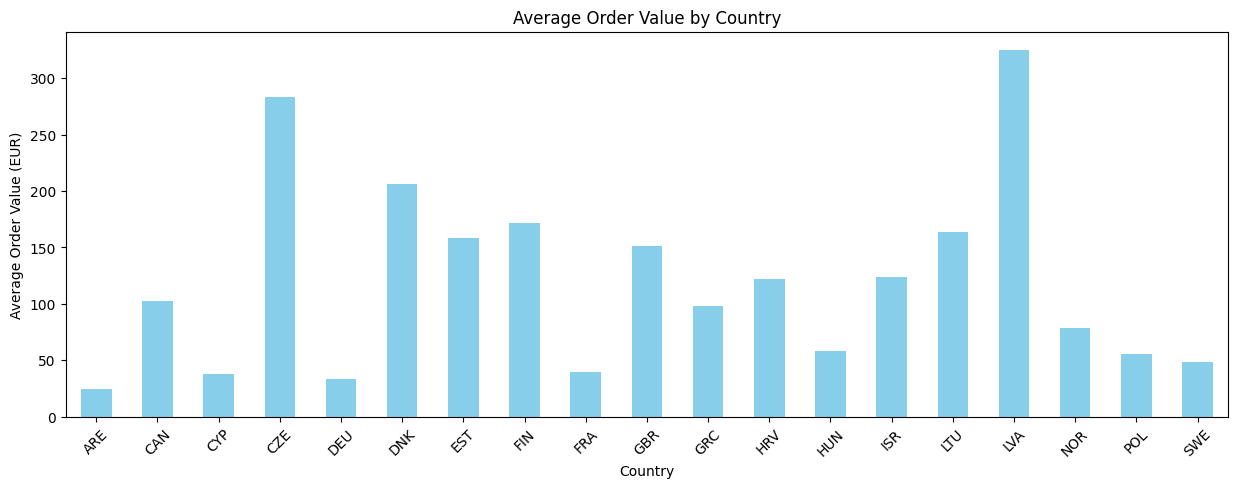

In [18]:
#Average Order Value by Country
avg_order_value = df_cleaned.groupby('REGISTRATION_COUNTRY')['TOTAL_PURCHASES_EUR'].mean()
avg_order_value.plot(kind='bar', color='skyblue', figsize=(15, 5))
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value (EUR)')
plt.xticks(rotation=45)
plt.show()

We can see from this matrics and analyses Latvia and Czech has the most average order value, but their active users are very low to actually generalize




In [28]:
# prompt: generate lva and cze full rows with purchase count>0

# Filter for LVA and CZE rows with purchase count > 0
lva_cze_df = df_cleaned[df_cleaned['REGISTRATION_COUNTRY'].isin(['LVA', 'CZE'])]

# Display the filtered data
lva_cze_df


REGISTRATION_DATE REGISTRATION_COUNTRY  PURCHASE_COUNT  \
31           2019-09-01                  LVA              33   
379          2019-09-01                  CZE               4   
2190         2019-09-04                  CZE               6   
9292         2019-09-14                  CZE              35   
18085        2019-09-25                  LVA               2   
18140        2019-09-25                  CZE               1   
20091        2019-09-28                  LVA               6   

       PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY FIRST_PURCHASE_DAY  \
31                        32.0                      1.0         2019-09-13   
379                        4.0                      0.0         2019-09-01   
2190                       6.0                      0.0         2019-09-04   
9292                      33.0                      2.0         2019-09-14   
18085                      2.0                      0.0         2019-10-07   
18140                      1.0                      0.0         2019-09-25   
20091                      5.0                      1.0         2019-12-18   

      LAST_PURCHASE_DAY  USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  ...  \
31           2020-10-29       32                  0.0              7.0  ...   
379          2019-12-01      380                  0.0              2.0  ...   
2190         2020-06-24     2191                  0.0              2.0  ...   
9292         2020-10-19     9293                  1.0             19.0  ...   
18085        2020-01-06    18086                  0.0              2.0  ...   
18140        2019-09-25    18141                  0.0              1.0  ...   
20091        2020-10-05    20092                  0.0              3.0  ...   

       WEB_PURCHASES  ANDROID_PURCHASES  PREFERRED_RESTAURANT_TYPES  \
31               0.0                0.0          [\n  "american"\n]   
379              0.0                4.0           [\n  "italian"\n]   
2190             0.0                6.0                         NaN   
9292             2.0                0.0          [\n  "american"\n]   
18085            0.0                2.0                         NaN   
18140            0.0                1.0                         NaN   
20091            0.0                6.0                         NaN   

       USER_HAS_VALID_PAYMENT_METHOD  MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE  \
31                              True                                     23.0   
379                            False                                      1.0   
2190                            True                                     11.0   
9292                            True                                     14.0   
18085                           True                                      8.0   
18140                           True                                     10.0   
20091                           True                                      8.0   

       MOST_COMMON_WEEKDAY_TO_PURCHASE  AVG_DAYS_BETWEEN_PURCHASES  \
31                                 2.0                        13.0   
379                                4.0                        30.0   
2190                               5.0                        59.0   
9292                               3.0                        12.0   
18085                              7.0                        91.0   
18140                              4.0                         NaN   
20091                              3.0                        58.0   

       MEDIAN_DAYS_BETWEEN_PURCHASES AVERAGE_DELIVERY_DISTANCE_KMS  \
31                               2.0                         6.747   
379                              2.0                         0.016   
2190                            19.0                        11.779   
9292                             9.0                        11.422   
18085                           91.0                        10.674   
18140                            NaN

In [29]:

# Calculate total purchase count per country
purchase_count_by_country = df.groupby('REGISTRATION_COUNTRY')['PURCHASE_COUNT'].sum()

# Sort the results from most to minimum purchases
sorted_purchase_counts = purchase_count_by_country.sort_values(ascending=False)

# Print the sorted results
sorted_purchase_counts


REGISTRATION_COUNTRY
FIN    34634
DNK    28222
GRC    10380
EST       85
CZE       46
LVA       41
NOR       29
LTU       24
GBR       17
ISR       16
HUN       12
POL        8
HRV        6
SWE        6
CAN        5
FRA        3
CYP        3
DEU        2
ARE        2
AUS        0
CHN        0
COL        0
CHE        0
BRA        0
BEL        0
AZE        0
AUT        0
HKG        0
FRO        0
GEO        0
GIN        0
ESP        0
CHL        0
ITA        0
IND        0
KOR        0
JPN        0
JOR        0
LBN        0
KWT        0
MEX        0
IRL        0
ISL        0
NLD        0
MLT        0
PHL        0
PAK        0
QAT        0
ROU        0
RUS        0
PRT        0
SAU        0
SGP        0
SVK        0
SVN        0
TUR        0
TWN        0
UKR        0
USA        0
Name: PURCHASE_COUNT, dtype: int64

by looking at the average order value by country and purchase count we got an idea, which country tends to order more and with more value. As said previously latvia and czech republic has higher average but lower in user, so its not suitable to generalize. but this countries might have potential so with previous preferred device data. a plan can be made to make more revenue

Lets Simplify it

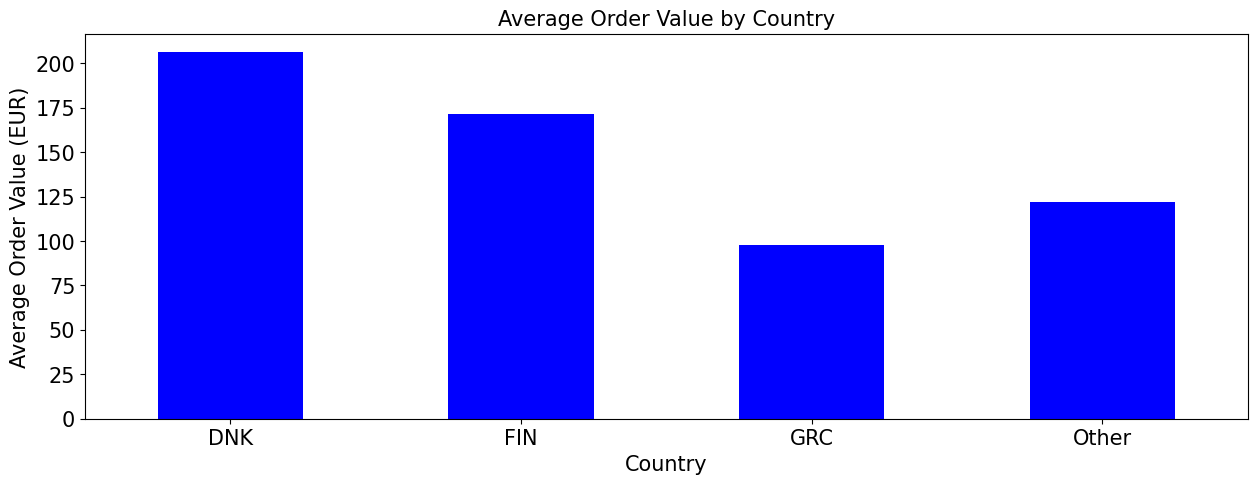

In [19]:
# Average Order Value by Country
avg_order_value = df_cleaned.groupby('SIMPLIFIED_COUNTRY')['TOTAL_PURCHASES_EUR'].mean()
avg_order_value.plot(kind='bar', color='blue', figsize=(15, 5))
plt.title('Average Order Value by Country', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Average Order Value (EUR)', fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show()

Denmark has the highest average order Value

Lets see the Average Days between purchases to find a a trend of each country

SIMPLIFIED_COUNTRY
DNK      1028537.092
FIN       933584.168
GRC       150036.084
Other       7301.580
Name: TOTAL_PURCHASES_EUR, dtype: float64


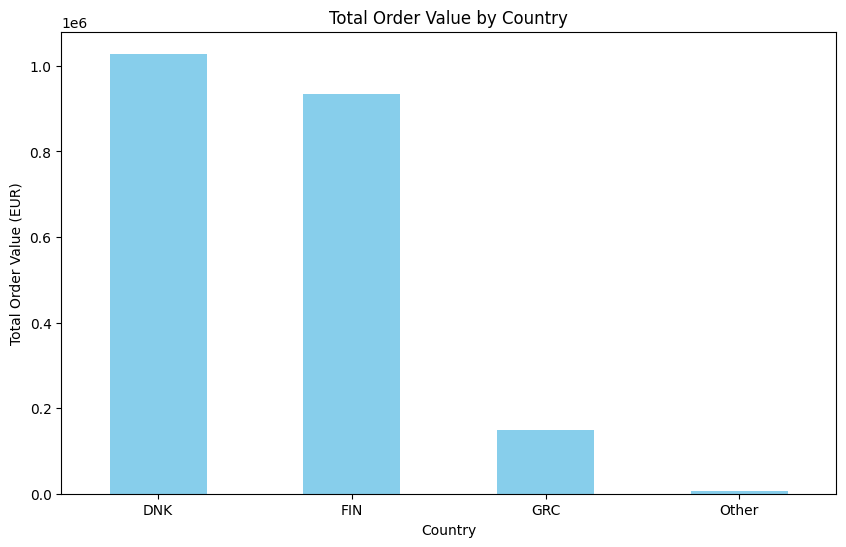

In [23]:
# prompt: generate total order value by country

# Calculate total order value by country
total_order_value_by_country = df_cleaned.groupby('SIMPLIFIED_COUNTRY')['TOTAL_PURCHASES_EUR'].sum()

# Print the results
print(total_order_value_by_country)

# Create a bar plot
plt.figure(figsize=(10, 6))
total_order_value_by_country.plot(kind='bar', color='skyblue')
plt.title('Total Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Order Value (EUR)')
plt.xticks(rotation=0)
plt.show()


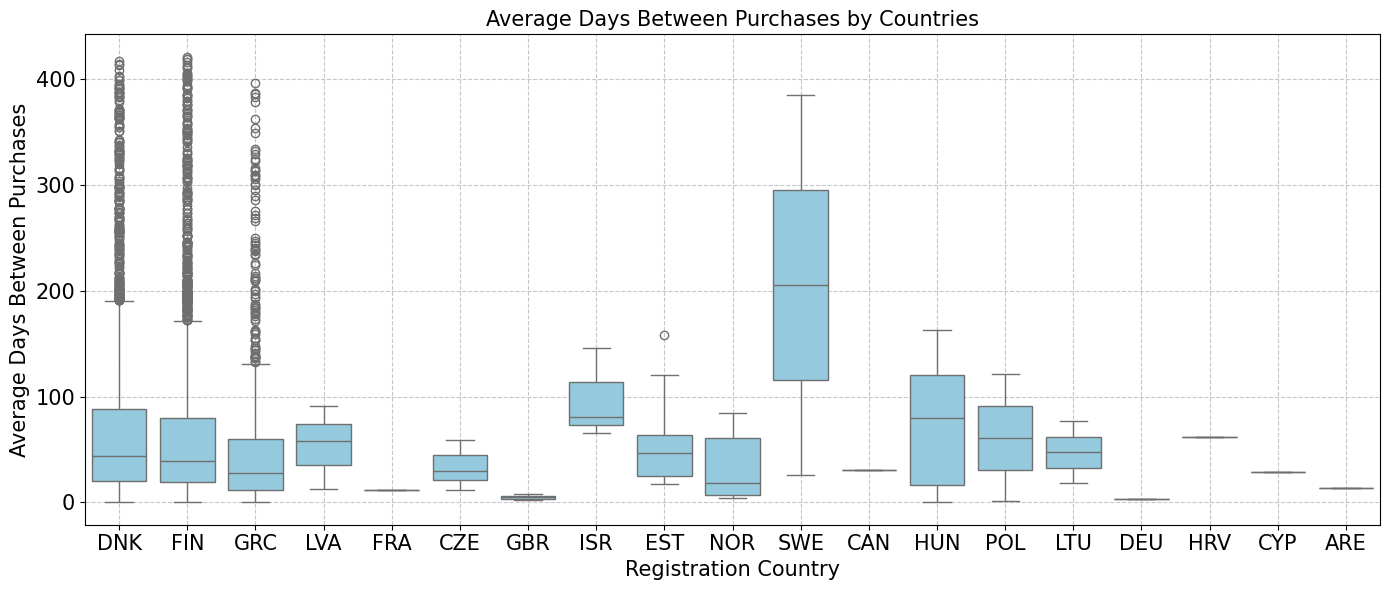

In [149]:
# Filter out rows where 'AVG_DAYS_BETWEEN_PURCHASES' is NaN
df_filtered = df.dropna(subset=['AVG_DAYS_BETWEEN_PURCHASES'])

# 1. AVG_DAYS_BETWEEN_PURCHASES vs. REGISTRATION_COUNTRY
plt.figure(figsize=(14, 6))
sns.boxplot(x='REGISTRATION_COUNTRY', y='AVG_DAYS_BETWEEN_PURCHASES', data=df_filtered, color='skyblue')
plt.title('Average Days Between Purchases by Countries', fontsize=15)
plt.xlabel('Registration Country', fontsize=15)
plt.ylabel('Average Days Between Purchases', fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The top three countries as a lot of Outliers, meaning they are irregular from the normal customers

Recommendation: Segment customers into groups based on behavior and target them with customized marketing campaigns.

Offer incentives for long inactive customers to return

In [44]:

# Calculate and print correlation coefficient between PURCHASE_COUNT and AVG_DAYS_BETWEEN_PURCHASES
correlation = df_filtered['PURCHASE_COUNT'].corr(df_filtered['AVG_DAYS_BETWEEN_PURCHASES'])
print(f"Correlation between Purchase Count and Avg Days Between Purchases: {correlation:.2f}")

Correlation between Purchase Count and Avg Days Between Purchases: -0.31


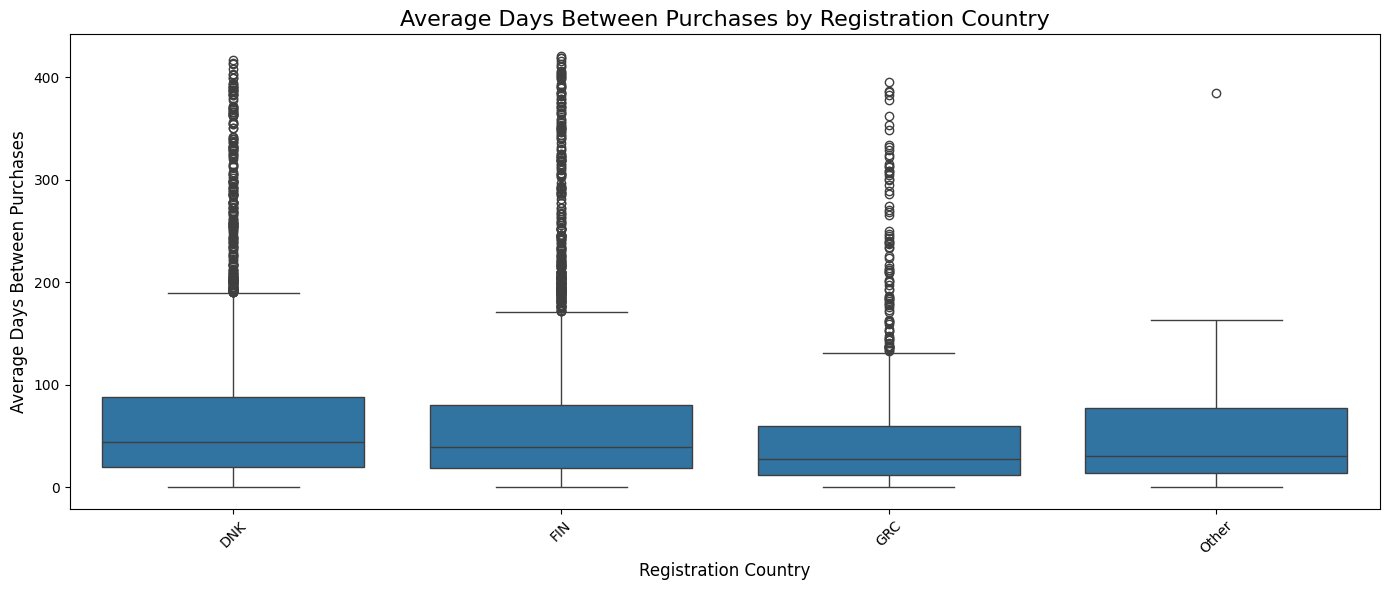

In [141]:
# Filter out rows where 'AVG_DAYS_BETWEEN_PURCHASES' is NaN
df_filtered = df.dropna(subset=['AVG_DAYS_BETWEEN_PURCHASES'])

# 1. AVG_DAYS_BETWEEN_PURCHASES vs. REGISTRATION_COUNTRY
plt.figure(figsize=(14, 6))
sns.boxplot(x='SIMPLIFIED_COUNTRY', y='AVG_DAYS_BETWEEN_PURCHASES', data=df_filtered)
plt.title('Average Days Between Purchases by Registration Country', fontsize=16)
plt.xlabel('Registration Country', fontsize=12)
plt.ylabel('Average Days Between Purchases', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

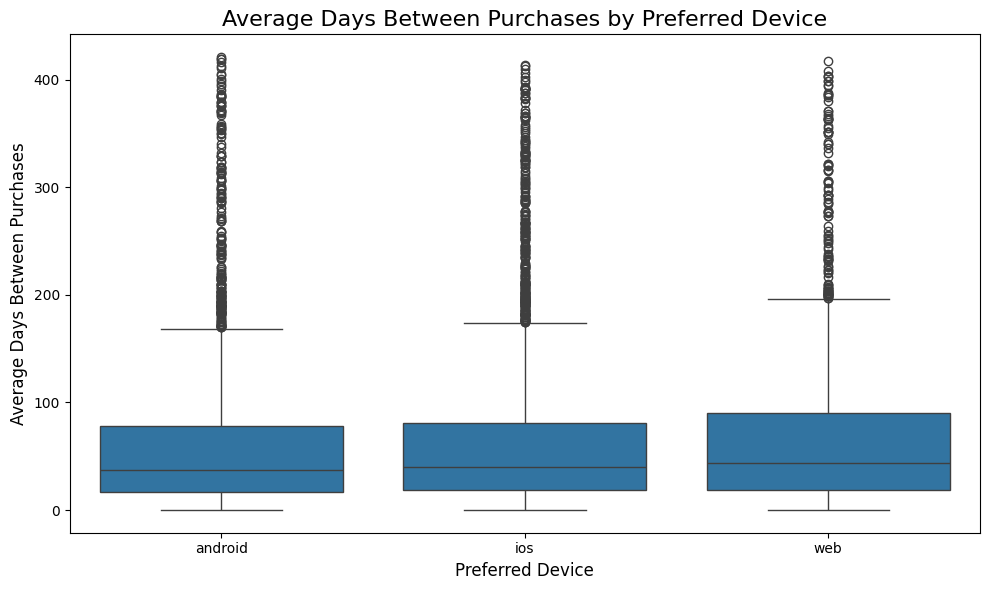

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PREFERRED_DEVICE', y='AVG_DAYS_BETWEEN_PURCHASES', data=df_filtered)
plt.title('Average Days Between Purchases by Preferred Device', fontsize=16)
plt.xlabel('Preferred Device', fontsize=12)
plt.ylabel('Average Days Between Purchases', fontsize=12)
plt.tight_layout()
plt.show()

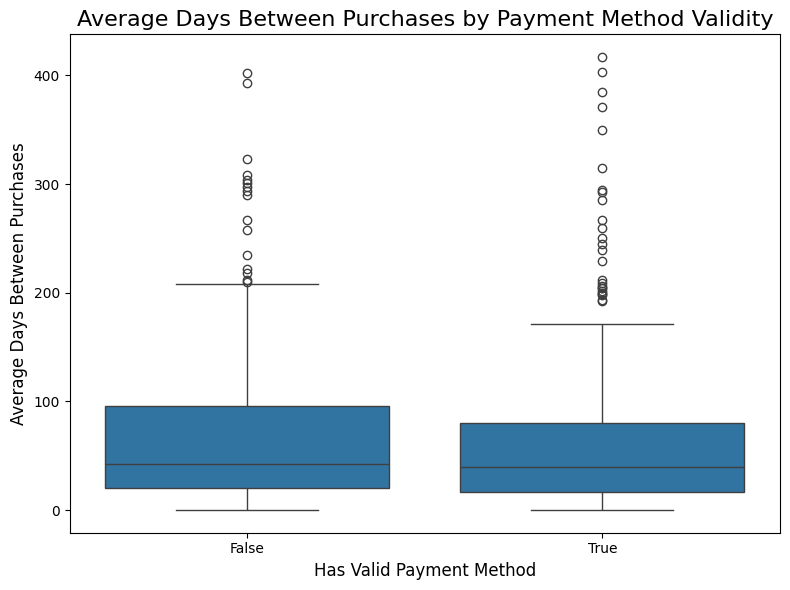

In [108]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='USER_HAS_VALID_PAYMENT_METHOD', y='AVG_DAYS_BETWEEN_PURCHASES', data=df_filtered)
plt.title('Average Days Between Purchases by Payment Method Validity', fontsize=16)
plt.xlabel('Has Valid Payment Method', fontsize=12)
plt.ylabel('Average Days Between Purchases', fontsize=12)
plt.tight_layout()
plt.show()

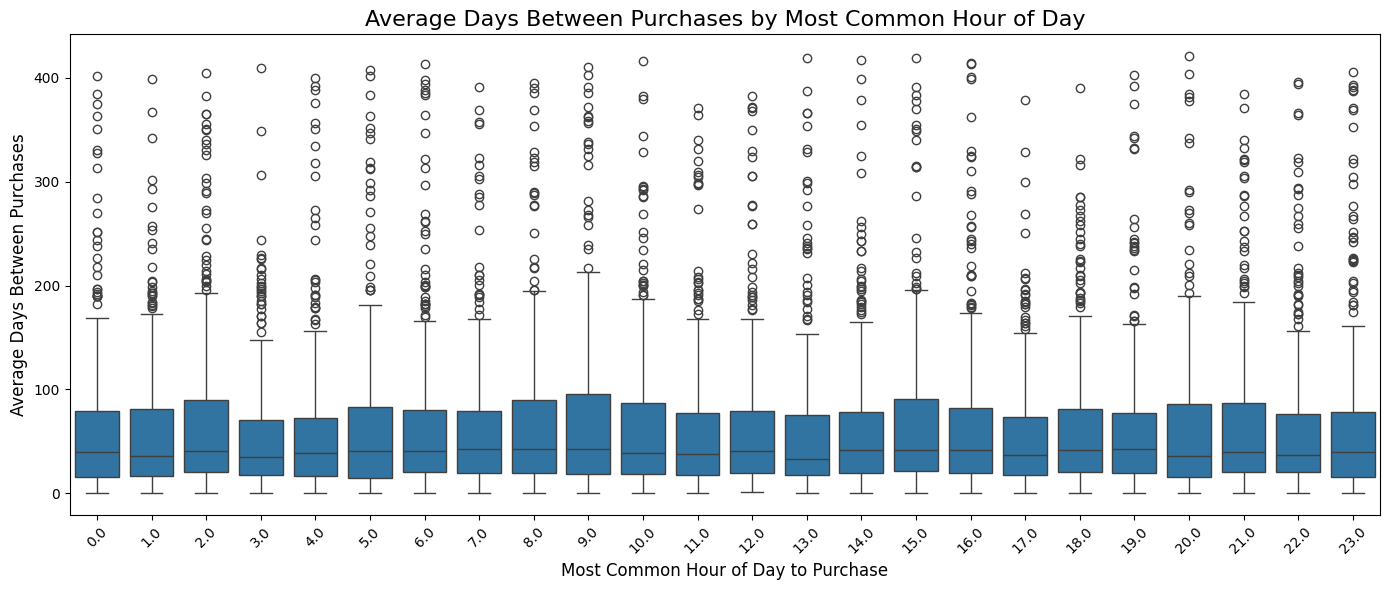

In [37]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', y='AVG_DAYS_BETWEEN_PURCHASES', data=df_filtered)
plt.title('Average Days Between Purchases by Most Common Hour of Day', fontsize=16)
plt.xlabel('Most Common Hour of Day to Purchase', fontsize=12)
plt.ylabel('Average Days Between Purchases', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Average Days Between Purchases vs. Purchase Count

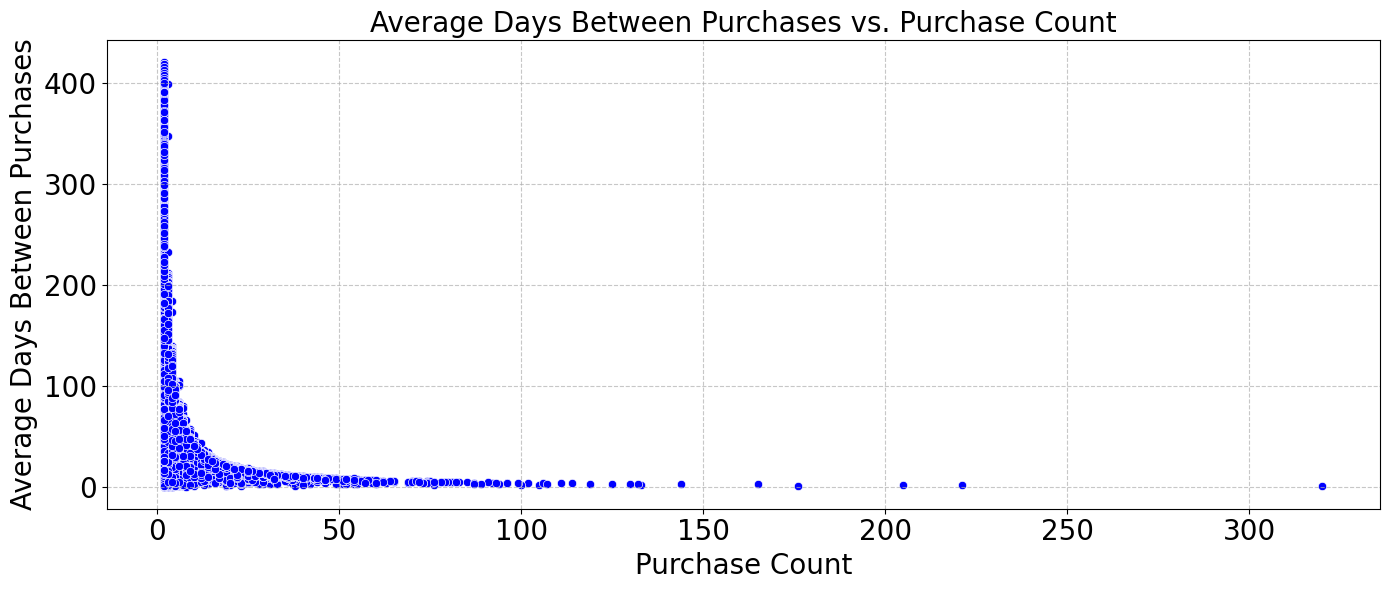

In [11]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='PURCHASE_COUNT', y='AVG_DAYS_BETWEEN_PURCHASES', data=df_cleaned, color='blue')
plt.title('Average Days Between Purchases vs. Purchase Count', fontsize=20)
plt.xlabel('Purchase Count', fontsize=20)
plt.ylabel('Average Days Between Purchases', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

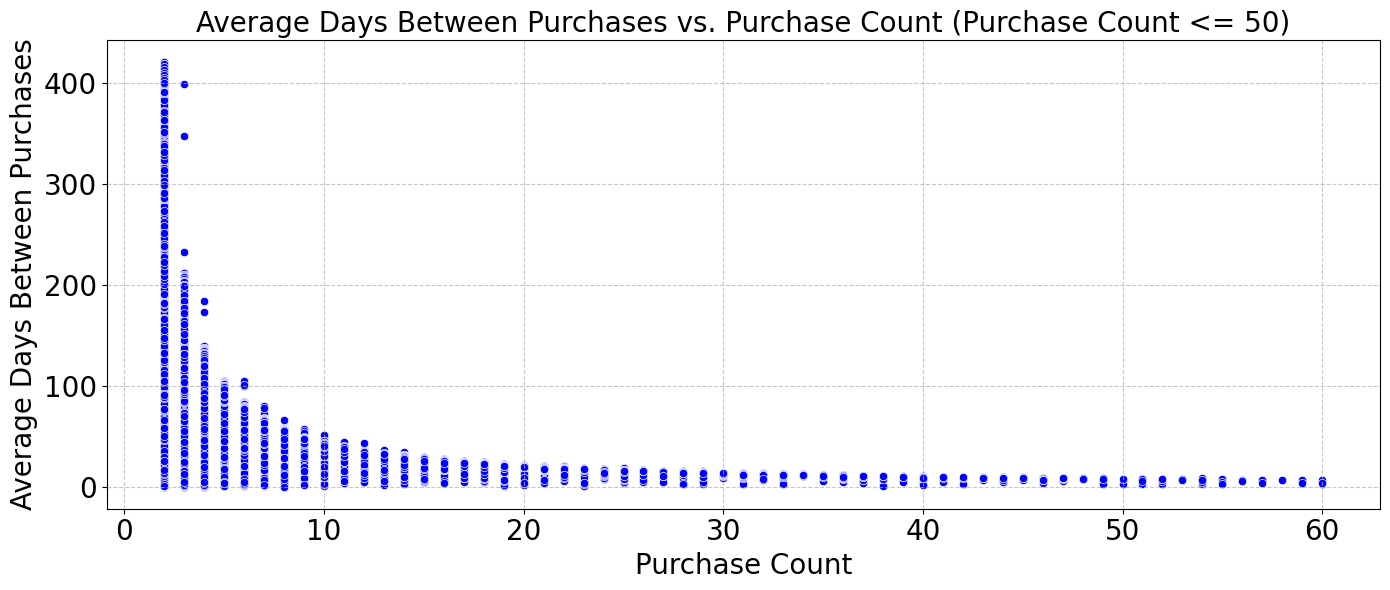

In [12]:
# Filter the data
filtered_df = df_cleaned[df_cleaned['PURCHASE_COUNT'] <= 60]

# Create the scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(x='PURCHASE_COUNT', y='AVG_DAYS_BETWEEN_PURCHASES', data=filtered_df, color='blue')
plt.title('Average Days Between Purchases vs. Purchase Count (Purchase Count <= 50)', fontsize=20)
plt.xlabel('Purchase Count', fontsize=20)
plt.ylabel('Average Days Between Purchases', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

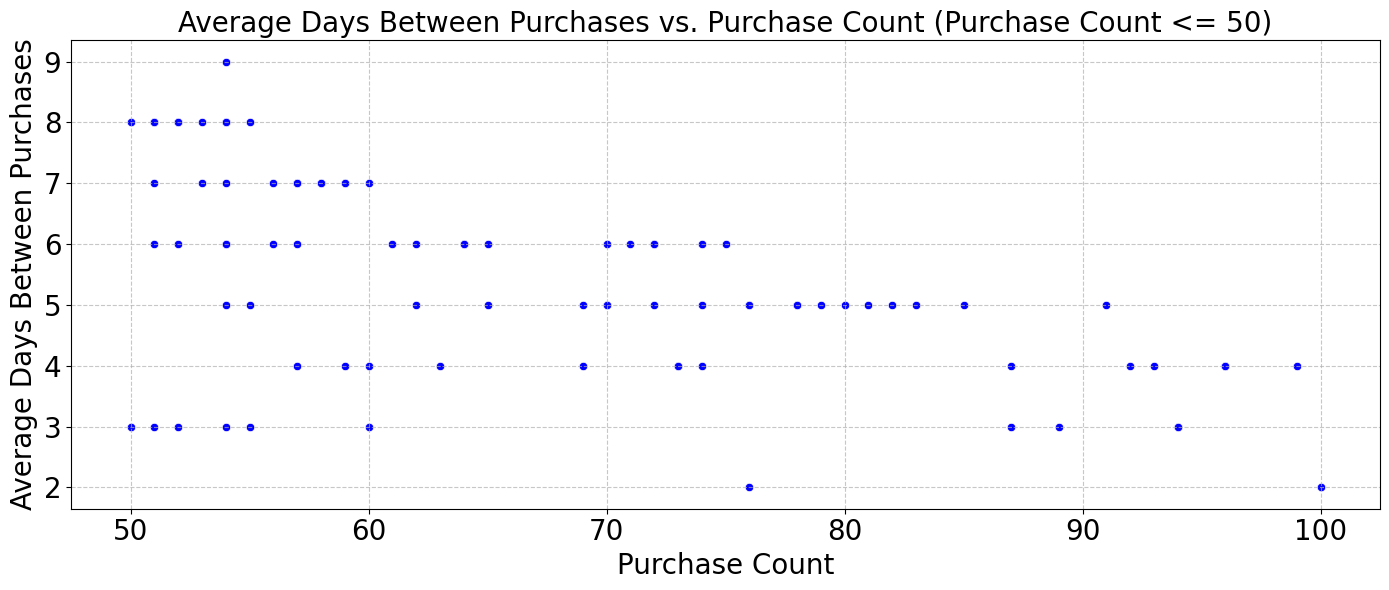

In [13]:
# Filter the data
filtered_df = df_cleaned[
    (df_cleaned['AVG_DAYS_BETWEEN_PURCHASES'] <= 20) &
    (df_cleaned['PURCHASE_COUNT'] >= 50) &
    (df_cleaned['PURCHASE_COUNT'] <= 100)
]

# Create the scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(x='PURCHASE_COUNT', y='AVG_DAYS_BETWEEN_PURCHASES', data=filtered_df, color='blue')
plt.title('Average Days Between Purchases vs. Purchase Count (Purchase Count <= 50)', fontsize=20)
plt.xlabel('Purchase Count', fontsize=20)
plt.ylabel('Average Days Between Purchases', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

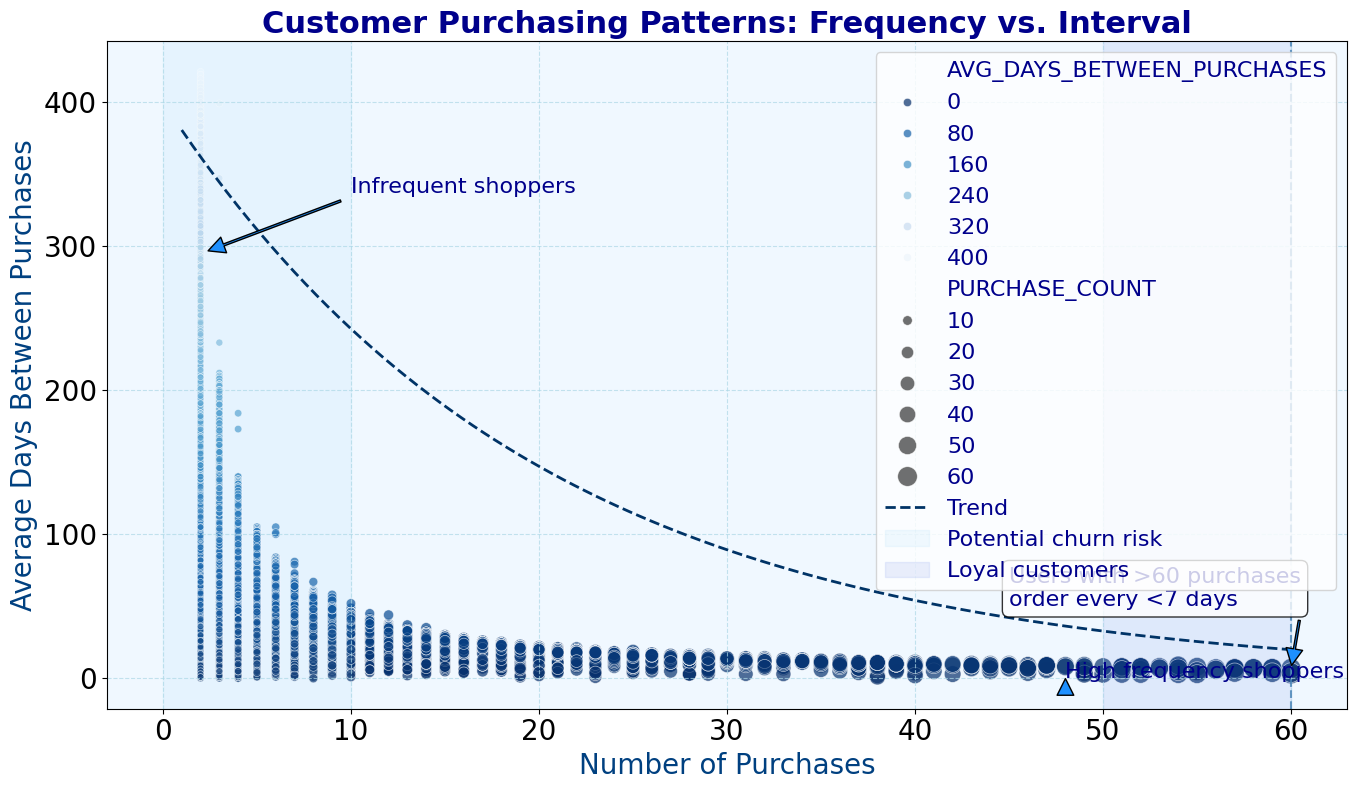

In [21]:
# Filter the data
filtered_df = df_cleaned[df_cleaned['PURCHASE_COUNT'] <= 60]

plt.figure(figsize=(14, 8))

# Create a gradient using blue color palette
blues = sns.color_palette("Blues_r", as_cmap=True)  # Reversed Blues palette

# Create scatter plot with blue theme
scatter = sns.scatterplot(
    x='PURCHASE_COUNT',
    y='AVG_DAYS_BETWEEN_PURCHASES',
    data=filtered_df,
    hue='AVG_DAYS_BETWEEN_PURCHASES',  # Color points by this value
    size='PURCHASE_COUNT',              # Vary point size by purchase count
    sizes=(20, 200),                    # Range of point sizes
    palette=blues,                      # Blue color palette
    alpha=0.7,                          # Add transparency
    edgecolor='white',                  # White outline makes points pop
    linewidth=0.5
)

# Add a trend line in a complementary blue shade
import numpy as np
x_data = filtered_df['PURCHASE_COUNT']
y_data = filtered_df['AVG_DAYS_BETWEEN_PURCHASES']
x_trend = np.linspace(x_data.min(), x_data.max(), 100)
y_trend = 400 * np.exp(-0.05 * x_trend)
plt.plot(x_trend, y_trend, color='#003366', linestyle='--', linewidth=2, label='Trend')

# Annotate key insights with blue theme
plt.annotate('High frequency shoppers',
             xy=(x_data.max()*0.8, y_data.min()*2),
             xytext=(x_data.max()*0.8, y_data.min()*10),
             arrowprops=dict(facecolor='#1E90FF', shrink=0.05, width=1.5),
             fontsize=16, color='#00008B')

plt.annotate('Infrequent shoppers',
             xy=(x_data.min()*2, y_data.max()*0.7),
             xytext=(x_data.min()*10, y_data.max()*0.8),
             arrowprops=dict(facecolor='#1E90FF', shrink=0.05, width=1.5),
             fontsize=16, color='#00008B')

# Add new annotation about users with purchase count > 60
plt.annotate('Users with >60 purchases\norder every <7 days',
             xy=(60, 7),
             xytext=(45, 50),
             arrowprops=dict(facecolor='#1E90FF', shrink=0.05, width=1.5),
             fontsize=16, color='#00008B',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Improved styling with blue theme
plt.title('Customer Purchasing Patterns: Frequency vs. Interval', fontsize=22, fontweight='bold', color='#00008B')
plt.xlabel('Number of Purchases', fontsize=20, color='#004080')
plt.ylabel('Average Days Between Purchases', fontsize=20, color='#004080')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Remove the legend for hue (it's redundant with the y-axis)
scatter.legend_.remove()

# Add highlighted regions in blue shades
plt.axvspan(0, 10, alpha=0.1, color='#87CEFA', label='Potential churn risk')  # Light blue
plt.axvspan(50, 60, alpha=0.1, color='#4169E1', label='Loyal customers')  # Royal blue

# Add a custom legend with blue theme
legend = plt.legend(loc='upper right', fontsize=16)
plt.setp(legend.get_texts(), color='#00008B')

# Add grid with blue styling
plt.grid(True, linestyle='--', alpha=0.7, color='#ADD8E6')

# Set background color to very light blue
plt.gca().set_facecolor('#F0F8FF')  # Alice blue - very light blue

# Draw a vertical dashed line at x=60 to indicate the filter threshold
plt.axvline(x=60, color='#4682B4', linestyle='--', alpha=0.8)

# Tighten layout and show
plt.tight_layout()
plt.show()

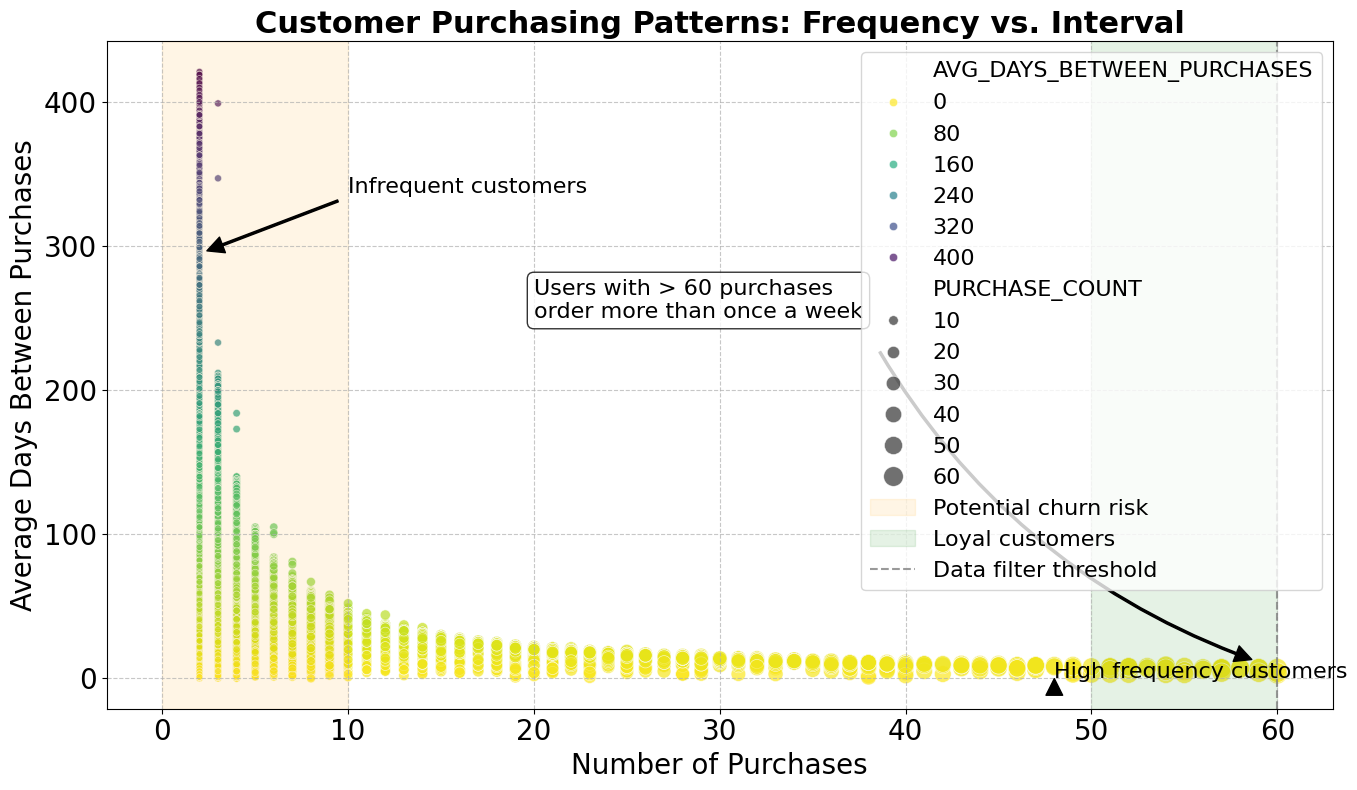

In [17]:
# Filter the data
filtered_df = df_cleaned[df_cleaned['PURCHASE_COUNT'] <= 60]
plt.figure(figsize=(14, 8))

# Create a custom colormap based on purchase frequency
scatter = sns.scatterplot(
    x='PURCHASE_COUNT',
    y='AVG_DAYS_BETWEEN_PURCHASES',
    data=filtered_df,
    hue='AVG_DAYS_BETWEEN_PURCHASES',  # Color points by this value
    size='PURCHASE_COUNT',             # Vary point size by purchase count
    sizes=(20, 200),                   # Range of point sizes
    palette='viridis_r',               # Keeping the original colormap
    alpha=0.7,                         # Add transparency
    edgecolor='white',                 # White outline makes points pop
    linewidth=0.5
)


from scipy import stats



# Annotate key insights
plt.annotate('High frequency customers',
             xy=(x_data.max()*0.8, y_data.min()*2),
             xytext=(x_data.max()*0.8, y_data.min()*10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=16)

plt.annotate('Infrequent customers',
             xy=(x_data.min()*2, y_data.max()*0.7),
             xytext=(x_data.min()*10, y_data.max()*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=16)

# Add new annotation about users with purchase count > 60 in a free space
plt.annotate('Users with > 60 purchases\norder more than once a week',
             xy=(60, 7),
             xytext=(20, 250),  # Moved to more free space
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, connectionstyle="arc3,rad=.2"),
             fontsize=16,
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Improved styling
plt.title('Customer Purchasing Patterns: Frequency vs. Interval', fontsize=22, fontweight='bold')
plt.xlabel('Number of Purchases', fontsize=20)
plt.ylabel('Average Days Between Purchases', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Remove the legend for hue (it's redundant with the y-axis)
scatter.legend_.remove()

# Add highlighted regions
plt.axvspan(0, 10, alpha=0.1, color='orange', label='Potential churn risk')
plt.axvspan(50, 60, alpha=0.1, color='green', label='Loyal customers')

# Draw a vertical dashed line at x=60 to indicate the filter threshold
plt.axvline(x=60, color='gray', linestyle='--', alpha=0.8, label='Data filter threshold')

# Add a custom legend
plt.legend(loc='upper right', fontsize=16)

# Add grid with better styling
plt.grid(True, linestyle='--', alpha=0.7)

# Tighten layout and show
plt.tight_layout()
plt.show()


📌 For High-Frequency Buyers (Right Side, Low Y-Value) - These are your most valuable customers!

**Recommendation:** Offer loyalty rewards, VIP benefits, or subscription models to keep them engaged.

📌 For Low-Frequency Buyers with Large Purchase Gaps (Left Side, High Y-Value-
These customers are sporadic buyers and need re-engagement.

**Recommendation:** Send reminders, personalized discounts, or limited-time offers to bring them back.

📌 For Customers with Few Purchases but Low Days Between Purchases (Bottom-Left Cluster)

They recently started buying and may turn into repeat customers.

**Recommendation:** Encourage them with first-time buyer discounts or "next purchase incentives."

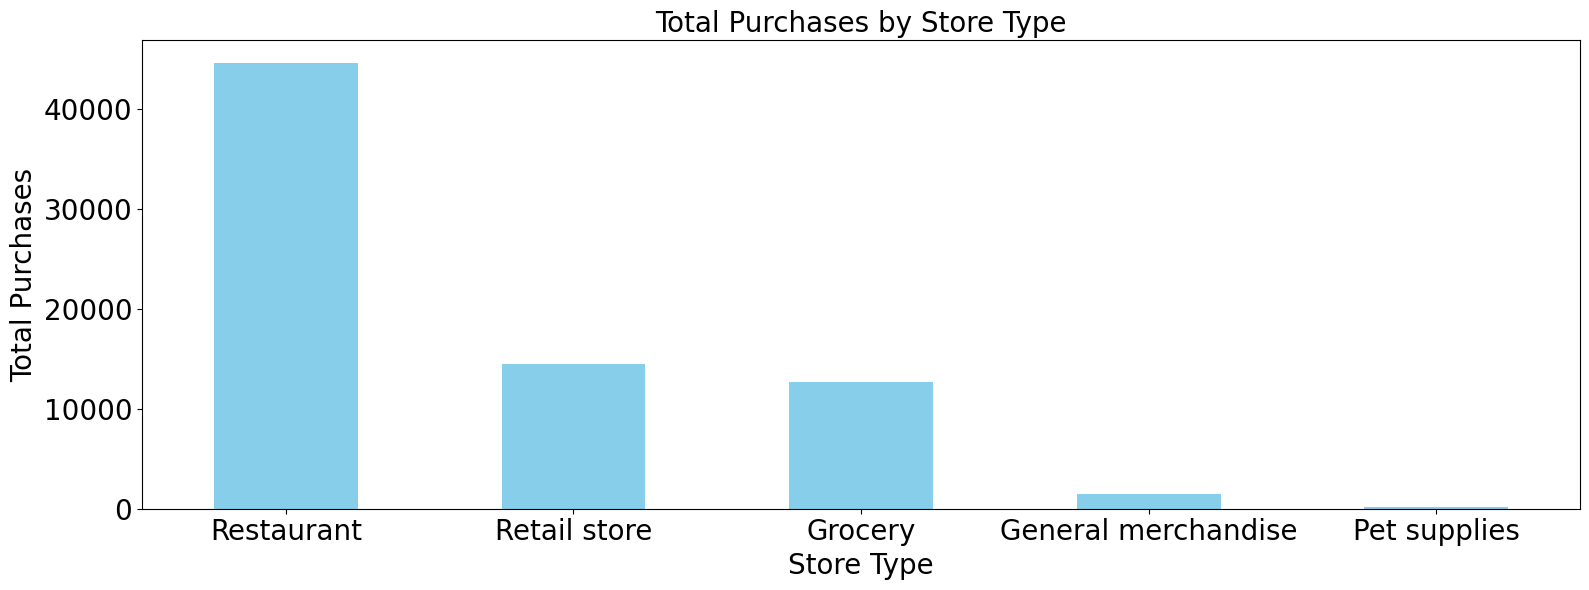


Total Purchases by Store Type:
Restaurant             44692
Retail store           14525
Grocery                12707
General merchandise     1442
Pet supplies             175
dtype: int64


In [57]:
# Distribution of Purchases by Store Type
store_type_totals = store_type_df.sum().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
store_type_totals.plot(kind='bar', color='skyblue')
plt.title('Total Purchases by Store Type', fontsize=20)
plt.xlabel('Store Type', fontsize=20)
plt.ylabel('Total Purchases', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
plt.show()

print("\nTotal Purchases by Store Type:")
print(store_type_totals)


Now lets sort it with only active users

Segmenting Users into three catagories of High, Medium and low spenders

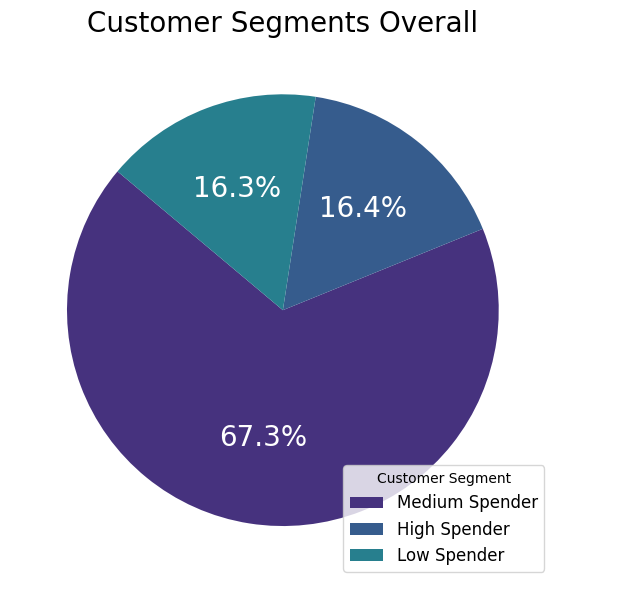

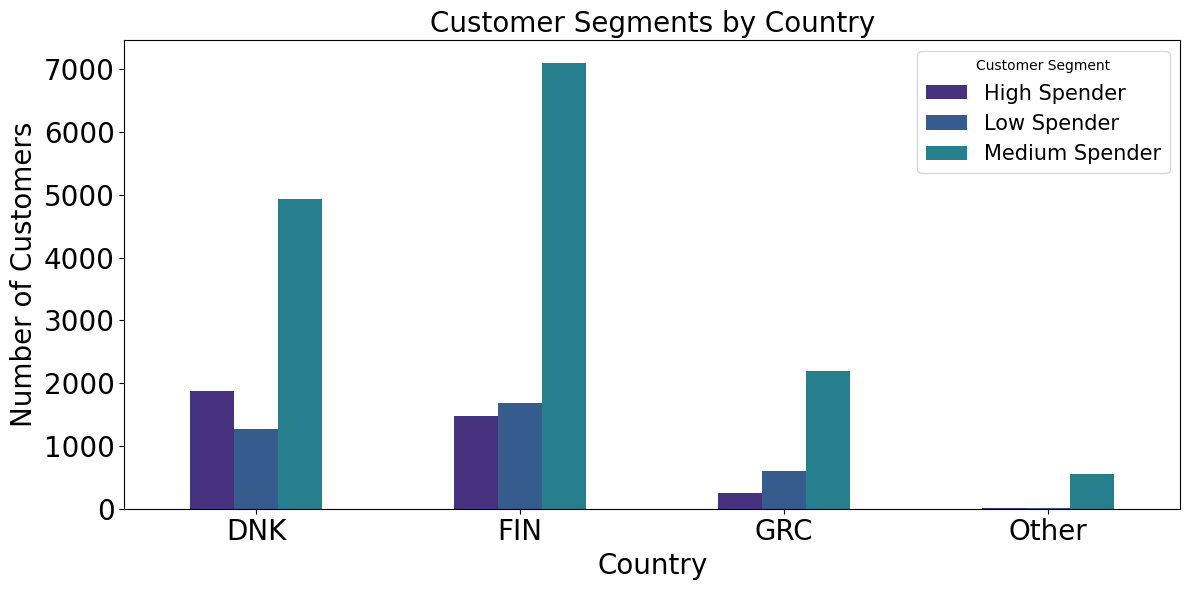

In [24]:
# Customer Segmentation Based on Spending Range
def segment_customers(df):
    """Segments customers based on their min and max purchase values."""
    df['spending_range'] = df['MAX_PURCHASE_VALUE_EUR'] - df['MIN_PURCHASE_VALUE_EUR']

    # Define spending thresholds
    high_threshold = df['spending_range'].quantile(0.70)
    low_threshold = df['spending_range'].quantile(0.30)

    # Assign segments
    df['customer_segment'] = 'Medium Spender'
    df.loc[df['spending_range'] > high_threshold, 'customer_segment'] = 'High Spender'
    df.loc[df['spending_range'] < low_threshold, 'customer_segment'] = 'Low Spender'

    return df

df = segment_customers(df)

# Geographic Spending Patterns
def analyze_geographic_spending(df):
    """Analyzes geographic spending patterns and counts customer segments per country."""
    country_segmentation = df.groupby(['SIMPLIFIED_COUNTRY', 'customer_segment']).size().unstack(fill_value=0)
    return country_segmentation

country_segmentation_data = analyze_geographic_spending(df)
# Customer Segmentation - Pie Chart
segment_counts = df['customer_segment'].value_counts()
plt.figure(figsize=(14, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), textprops={'fontsize': 20, 'color': 'white'})
plt.title('Customer Segments Overall', fontsize=20)
plt.legend(title='Customer Segment', fontsize=12)
plt.tight_layout()
plt.show()

# Customer Segments by Country - Bar Chart
country_segmentation_data.plot(kind='bar', figsize=(12, 6), color=sns.color_palette('viridis'), fontsize=20)
plt.title('Customer Segments by Country', fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.legend(title='Customer Segment', fontsize=15)
plt.tight_layout()
plt.show()

In [35]:
def calculate_segment_percentages(df):
    """Calculates the percentage of each customer segment within each country."""
    # Group data by country and segment, then calculate percentages
    country_percentages = df.groupby('SIMPLIFIED_COUNTRY')['customer_segment'].value_counts(normalize=True) * 100
    country_percentages = country_percentages.unstack(fill_value=0)
    return country_percentages

country_segment_percentages = calculate_segment_percentages(df)
country_segment_percentages


customer_segment    High Spender  Low Spender  Medium Spender
SIMPLIFIED_COUNTRY                                           
DNK                    23.165450    15.790125       61.044425
FIN                    14.371898    16.454218       69.173883
GRC                     8.021039    19.953978       72.024984
Other                   2.744425     2.401372       94.854202

In [38]:
# Count customers by segment and country
def count_segments_by_country(df):
    """
    Counts the number of customers in each segment and breaks down each segment by country.

    Returns:
        segment_totals: Dictionary with total count for each segment
        segment_by_country: Dictionary with country breakdown for each segment
    """
    # Total counts for each segment
    segment_totals = df['customer_segment'].value_counts().to_dict()

    # Initialize dictionary to hold country breakdowns for each segment
    segment_by_country = {}

    # For each segment, count customers by country
    for segment in ['High Spender', 'Medium Spender', 'Low Spender']:
        # Get subset of customers in this segment
        segment_df = df[df['customer_segment'] == segment]

        # Count by country and convert to dictionary
        country_counts = segment_df['SIMPLIFIED_COUNTRY'].value_counts().to_dict()

        # Store in main dictionary
        segment_by_country[segment] = country_counts

    return segment_totals, segment_by_country

# Execute the function
segment_totals, segment_by_country = count_segments_by_country(df)

# Print the results
print("CUSTOMER SEGMENT ANALYSIS\n")

# Print total counts
print("TOTAL CUSTOMERS BY SEGMENT:")
for segment, count in segment_totals.items():
    print(f"{segment}: {count} customers")
print("\n")

# Print country breakdowns for each segment
for segment, countries in segment_by_country.items():
    print(f"{segment.upper()} BREAKDOWN BY COUNTRY:")
    for country, count in sorted(countries.items(), key=lambda x: x[1], reverse=True):
        percentage = (count / segment_totals[segment]) * 100
        print(f"  {country}: {count} customers ({percentage:.1f}%)")
    print("\n")

CUSTOMER SEGMENT ANALYSIS

TOTAL CUSTOMERS BY SEGMENT:
Medium Spender: 14786 customers
High Spender: 3609 customers
Low Spender: 3588 customers


HIGH SPENDER BREAKDOWN BY COUNTRY:
  DNK: 1872 customers (51.9%)
  FIN: 1477 customers (40.9%)
  GRC: 244 customers (6.8%)
  Other: 16 customers (0.4%)


MEDIUM SPENDER BREAKDOWN BY COUNTRY:
  FIN: 7109 customers (48.1%)
  DNK: 4933 customers (33.4%)
  GRC: 2191 customers (14.8%)
  Other: 553 customers (3.7%)


LOW SPENDER BREAKDOWN BY COUNTRY:
  FIN: 1691 customers (47.1%)
  DNK: 1276 customers (35.6%)
  GRC: 607 customers (16.9%)
  Other: 14 customers (0.4%)




# **User Engagement**

Most Common Hour of the Day to Purchase

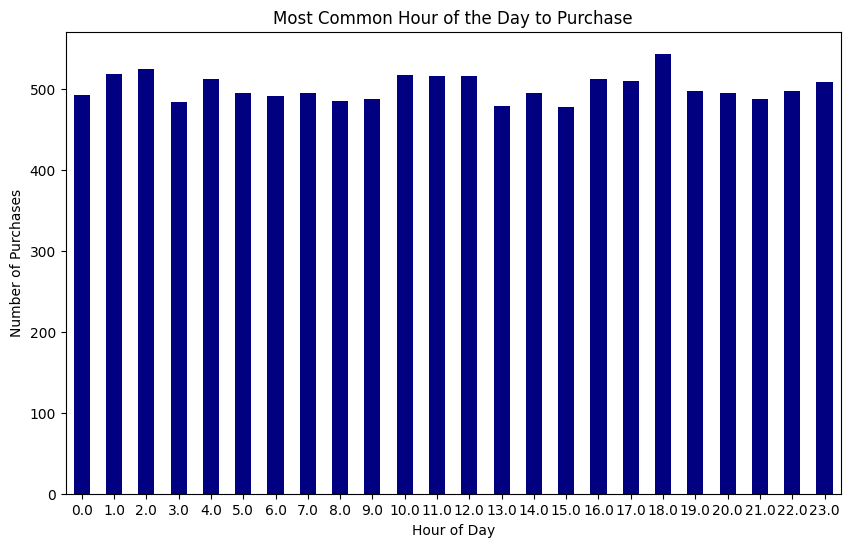

In [61]:
hourly_purchase_counts = df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts()
hourly_purchase_counts.sort_index().plot(kind='bar', color='navy', figsize=(10, 6))
plt.title('Most Common Hour of the Day to Purchase')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.show()

Most Common weekday to Purchase

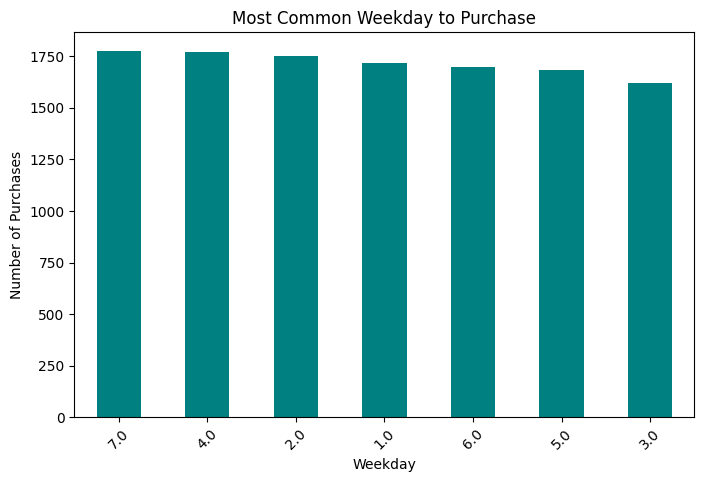

In [31]:
weekday_purchase_counts = df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts()
weekday_purchase_counts.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Most Common Weekday to Purchase')
plt.xlabel('Weekday')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

We can see both common hours and common weekdays are pretty consistant

Lets see how it goes by top 5 purchase count country

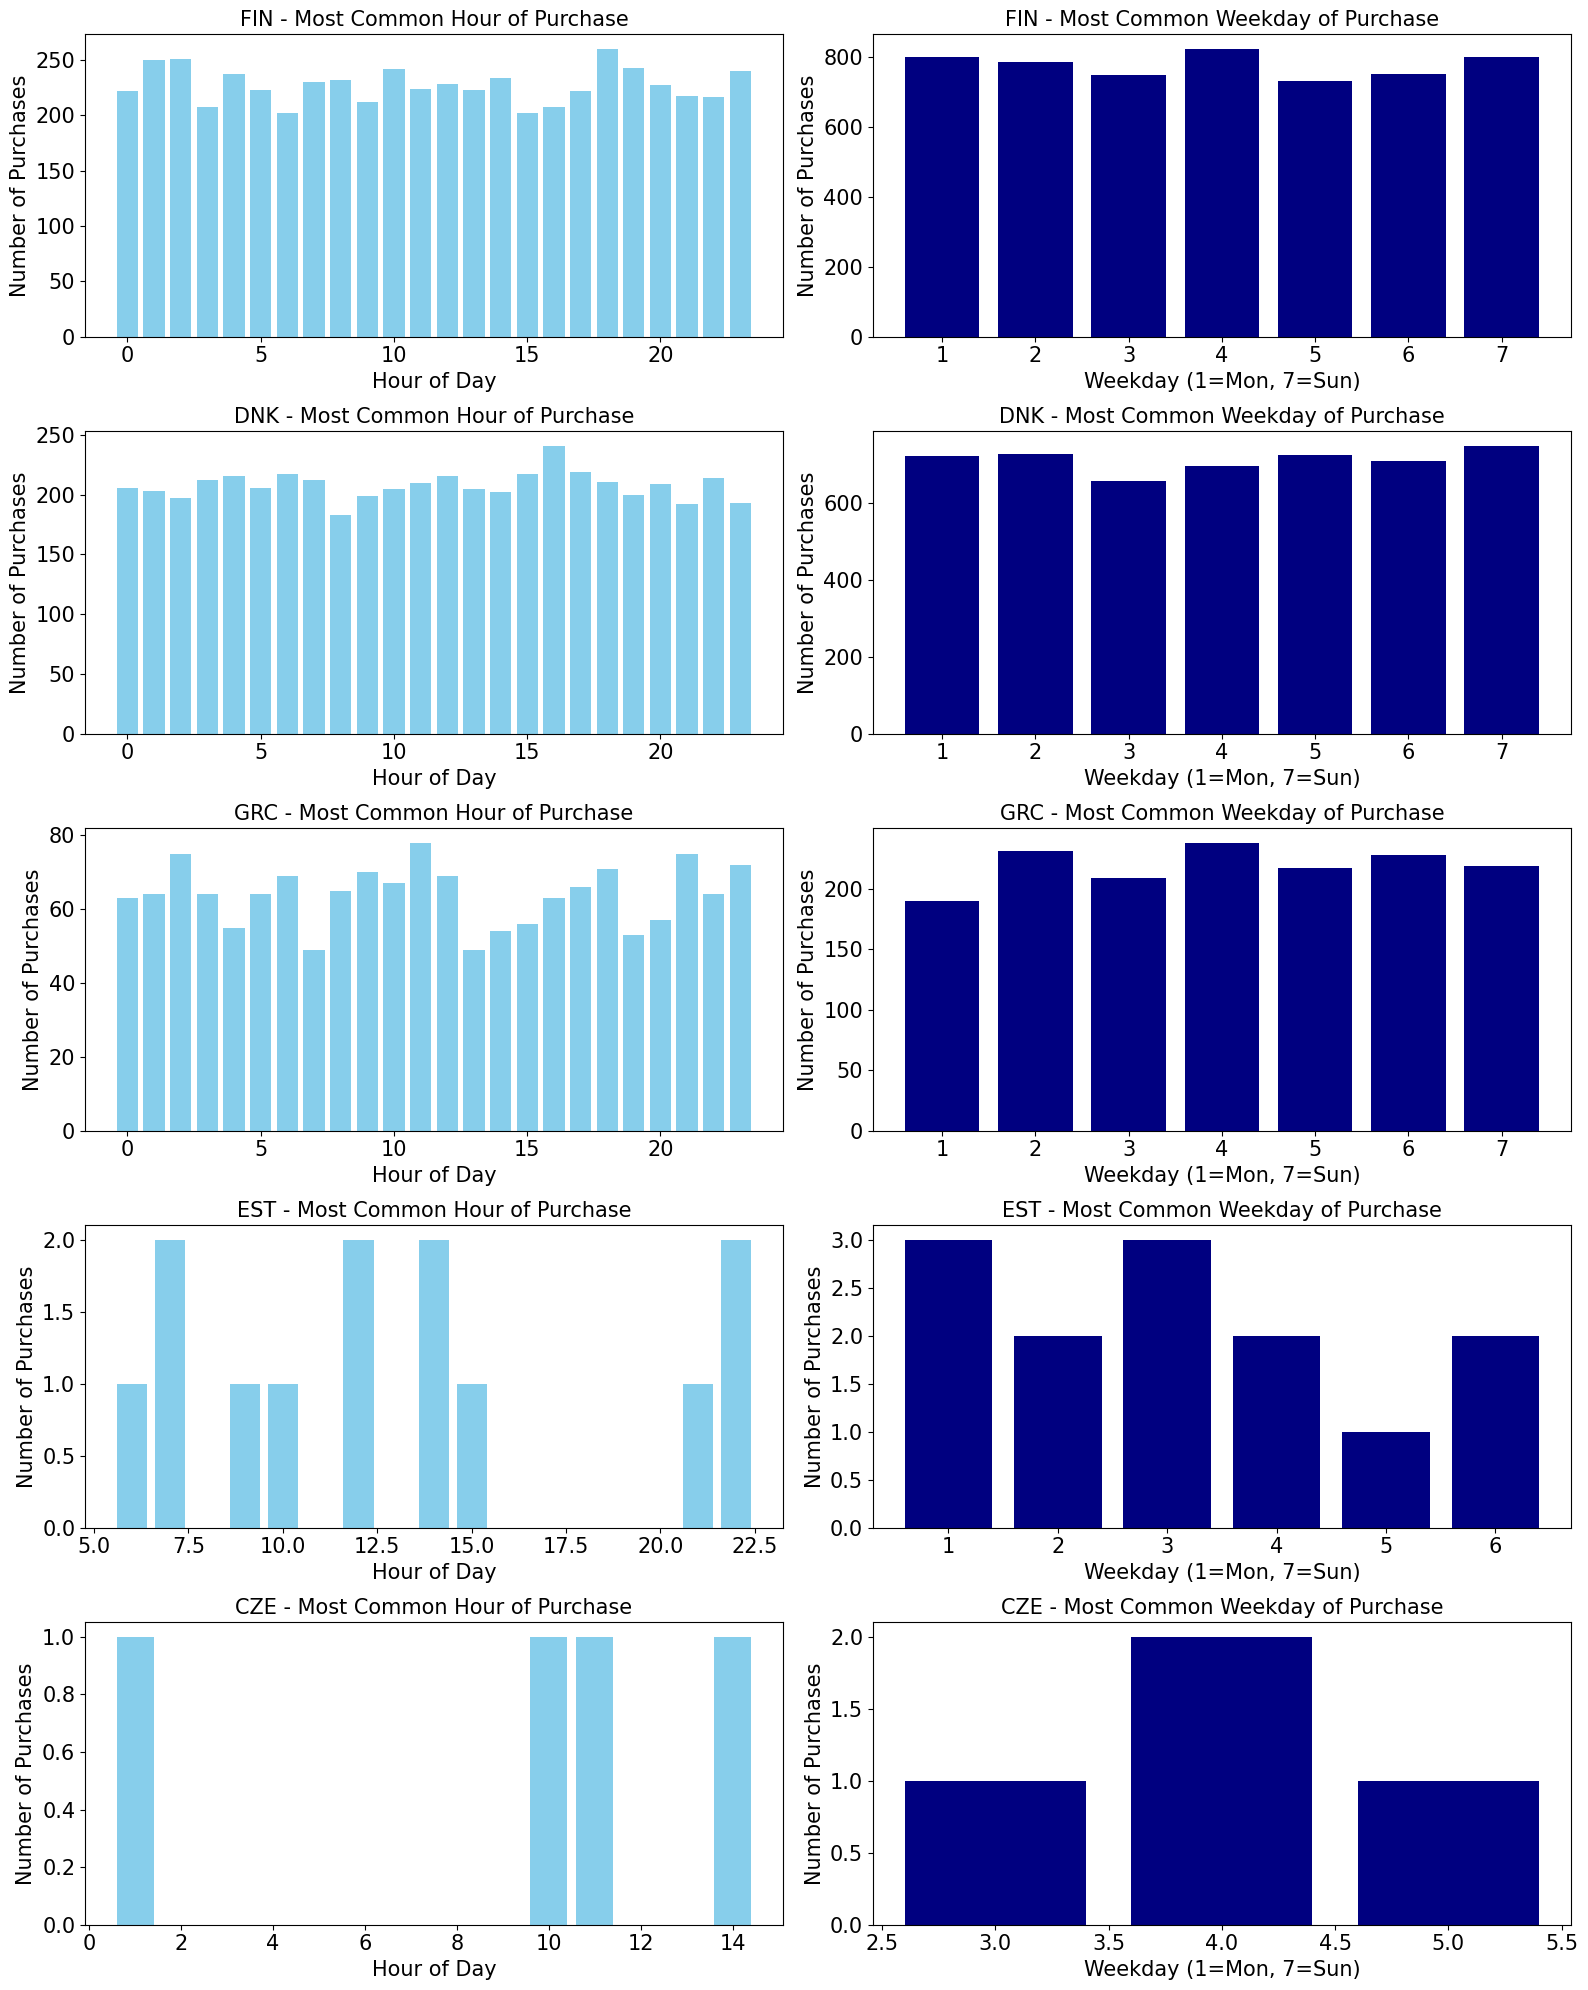

In [63]:
# Calculate total purchase counts by country
total_purchase_counts = df.groupby('REGISTRATION_COUNTRY')['PURCHASE_COUNT'].sum()

# Get the top 5 countries by total purchase counts
top_countries_by_purchase = total_purchase_counts.nlargest(5).index

# Filter the DataFrame to include only the top 5 countries
df_top_countries = df[df['REGISTRATION_COUNTRY'].isin(top_countries_by_purchase)]

# Create subplots for visualization
fig, axes = plt.subplots(5, 2, figsize=(16, 20))  # 5 rows, 2 columns (one for hour, one for weekday)
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each top country and plot data
for i, country in enumerate(top_countries_by_purchase):
    # Filter data for the current country
    country_data = df_top_countries[df_top_countries['REGISTRATION_COUNTRY'] == country]

    # Most common hour of the day to purchase
    hour_counts = country_data['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().sort_index()
    axes[i * 2].bar(hour_counts.index, hour_counts.values, color='skyblue')
    axes[i * 2].set_title(f'{country} - Most Common Hour of Purchase', fontsize=15)
    axes[i * 2].set_xlabel('Hour of Day', fontsize=15)
    axes[i * 2].set_ylabel('Number of Purchases', fontsize=15)
    axes[i * 2].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    axes[i * 2].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    # Most common weekday to purchase
    weekday_counts = country_data['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().sort_index()
    axes[i * 2 + 1].bar(weekday_counts.index, weekday_counts.values, color='navy')
    axes[i * 2 + 1].set_title(f'{country} - Most Common Weekday of Purchase', fontsize=15)
    axes[i * 2 + 1].set_xlabel('Weekday (1=Mon, 7=Sun)', fontsize=15)
    axes[i * 2 + 1].set_ylabel('Number of Purchases', fontsize=15)
    axes[i * 2 + 1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    axes[i * 2 + 1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size


# Adjust layout for better readability
plt.tight_layout()
plt.show()

Wolt can follow each of this countries common week day and hours to target more orders

Lets see the top preferred restaurant type of users. Counting only the first choice of every user

<ipython-input-43-3af062b628e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TOP_RESTAURANT_TYPE'] = df_cleaned['PREFERRED_RESTAURANT_TYPES'].apply(extract_top_restaurant)


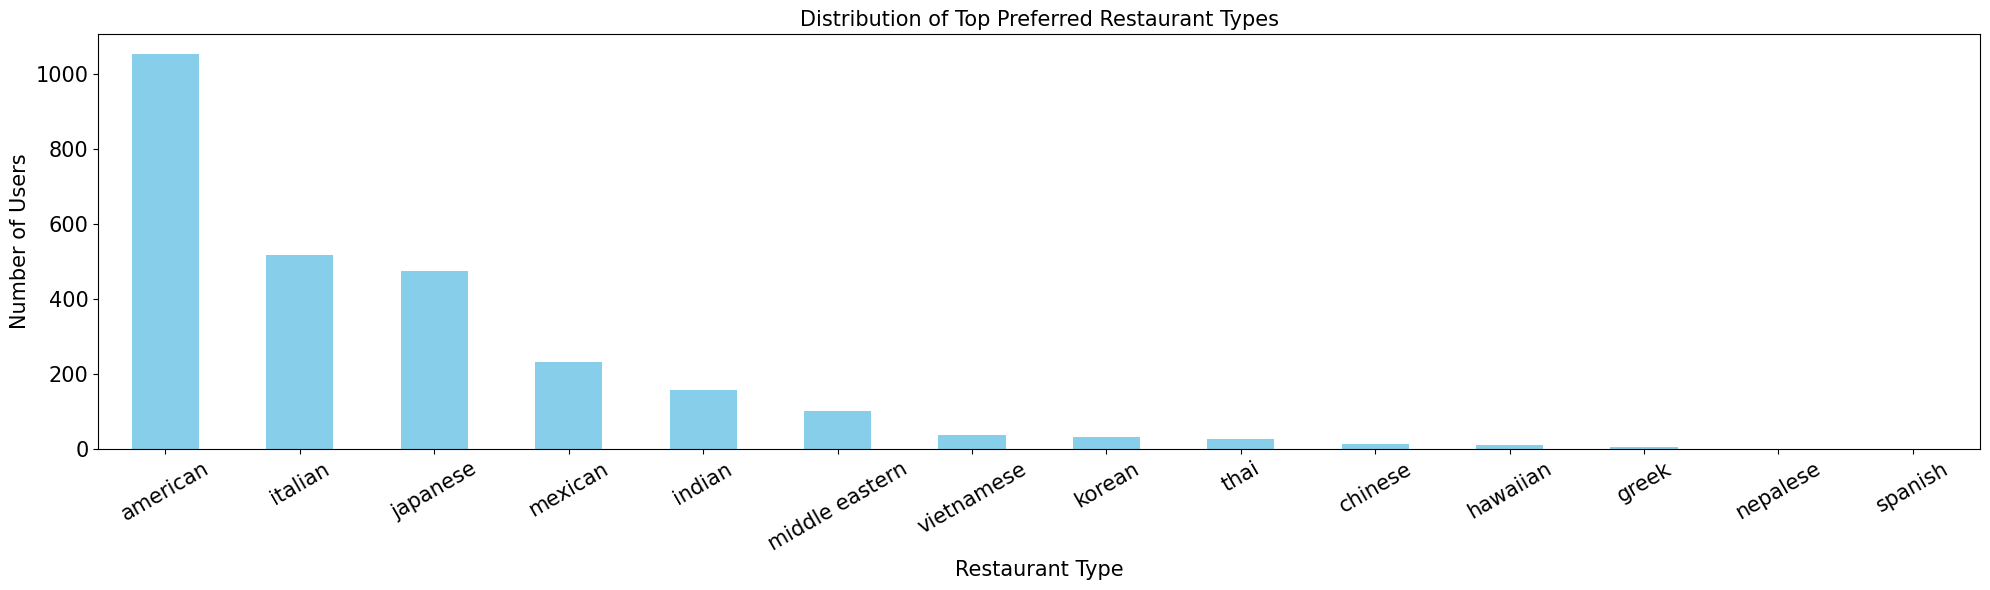


Distribution of Top Preferred Restaurant Types:
TOP_RESTAURANT_TYPE
american          1054
italian            517
japanese           476
mexican            233
indian             158
middle eastern     101
vietnamese          36
korean              33
thai                27
chinese             13
hawaiian            11
greek                5
nepalese             1
spanish              1
Name: count, dtype: int64


In [43]:
# Apply the function to extract the top restaurant type
df_cleaned['TOP_RESTAURANT_TYPE'] = df_cleaned['PREFERRED_RESTAURANT_TYPES'].apply(extract_top_restaurant)

# Distribution of Top Restaurant Types
restaurant_counts = df_cleaned['TOP_RESTAURANT_TYPE'].value_counts().dropna()

plt.figure(figsize=(20, 6))
restaurant_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Top Preferred Restaurant Types', fontsize=15)
plt.xlabel('Restaurant Type', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout()
plt.show()

print("\nDistribution of Top Preferred Restaurant Types:")
print(restaurant_counts)


Preference by country

<Figure size 1400x800 with 0 Axes>

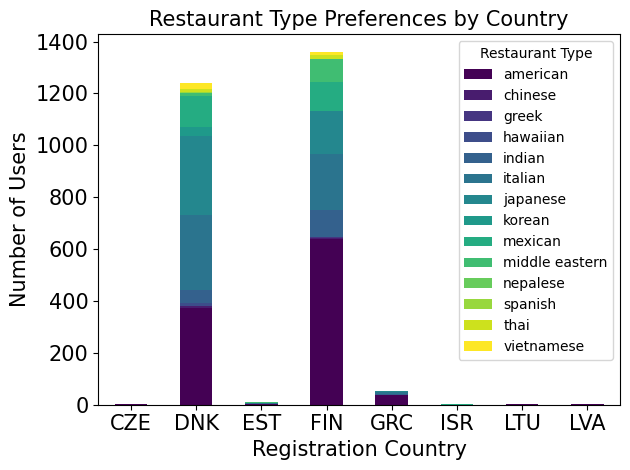


Restaurant Type Preferences by Country:
TOP_RESTAURANT_TYPE   american  chinese  greek  hawaiian  indian  italian  \
REGISTRATION_COUNTRY                                                        
CZE                        1.0      0.0    0.0       0.0     0.0      1.0   
DNK                      371.0      8.0    1.0      11.0    53.0    288.0   
EST                        2.0      0.0    0.0       0.0     2.0      2.0   
FIN                      639.0      5.0    4.0       0.0   101.0    218.0   
GRC                       39.0      0.0    0.0       0.0     2.0      8.0   
ISR                        0.0      0.0    0.0       0.0     0.0      0.0   
LTU                        1.0      0.0    0.0       0.0     0.0      0.0   
LVA                        1.0      0.0    0.0       0.0     0.0      0.0   

TOP_RESTAURANT_TYPE   japanese  korean  mexican  middle eastern  nepalese  \
REGISTRATION_COUNTRY                                                        
CZE                        0.0    

In [46]:
# Restaurant Type Preferences by Country
country_restaurant_counts = df_cleaned.groupby('REGISTRATION_COUNTRY')['TOP_RESTAURANT_TYPE'].value_counts().unstack().fillna(0)

cmap = sns.color_palette("Blues", as_cmap=True)
num_colors = 14  # Number of colors you want
colors = cmap(np.linspace(0.3, 1, num_colors)) # Start from 0.3 to avoid the lightest part

plt.figure(figsize=(14, 8))
country_restaurant_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Restaurant Type Preferences by Country', fontsize=15)
plt.xlabel('Registration Country', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.legend(title='Restaurant Type')
plt.tight_layout()
plt.show()

print("\nRestaurant Type Preferences by Country:")
print(country_restaurant_counts)

From this we can see only finland and denmark registered users have their preferred resturaunts data so we only consider them

In [35]:
total_count = restaurant_counts.sum()

# Percentage of American restaurants
american_percentage = (restaurant_counts["american"] / total_count) * 100
print(f"Percentage of American restaurants: {american_percentage:.2f}%")

Percentage of American restaurants: 39.53%


Store Type Preference By country

<Figure size 2000x800 with 0 Axes>

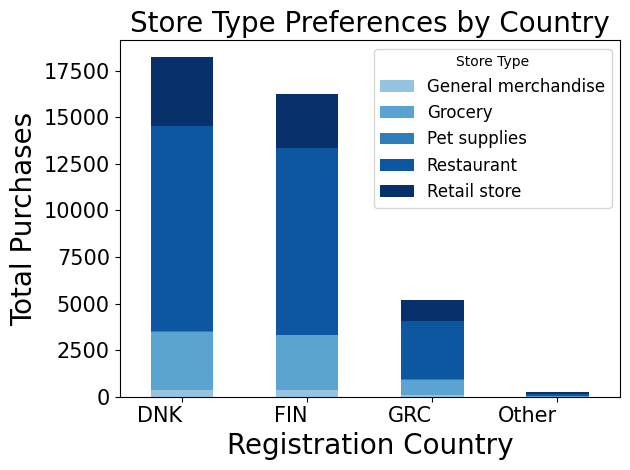


Store Type Preferences by Country:
                    General merchandise  Grocery  Pet supplies  Restaurant  \
SIMPLIFIED_COUNTRY                                                           
DNK                               353.0   3145.0          47.0     10974.0   
FIN                               341.0   2952.0          35.0     10007.0   
GRC                                83.0    832.0          12.0      3164.0   
Other                               6.0     23.0           0.0       143.0   

                    Retail store  
SIMPLIFIED_COUNTRY                
DNK                       3704.0  
FIN                       2897.0  
GRC                       1120.0  
Other                       83.0  


In [49]:

# Store Type Preferences by Country
country_store_preferences = df_combined.groupby('SIMPLIFIED_COUNTRY')[store_type_df.columns].sum()

cmap = sns.color_palette("Blues", as_cmap=True)

# Select a range of colors, excluding the lightest shades
num_colors = 5 # Number of colors you want
colors = cmap(np.linspace(0.4, 1, num_colors))
plt.figure(figsize=(20, 8))
country_store_preferences.plot(kind='bar', stacked=True, color=colors)
plt.title('Store Type Preferences by Country', fontsize=20)
plt.xlabel('Registration Country', fontsize=20)
plt.ylabel('Total Purchases', fontsize=20)
plt.xticks(rotation=0, ha='right', fontsize=15)
plt.yticks(rotation=0, ha='right', fontsize=15)
plt.legend(title='Store Type', fontsize=12)
plt.tight_layout()
plt.show()

print("\nStore Type Preferences by Country:")
print(country_store_preferences)


Restaurants Dominates!

Tried to see if there is any relation between Store Type vs Preferred Device

<Figure size 1400x800 with 0 Axes>

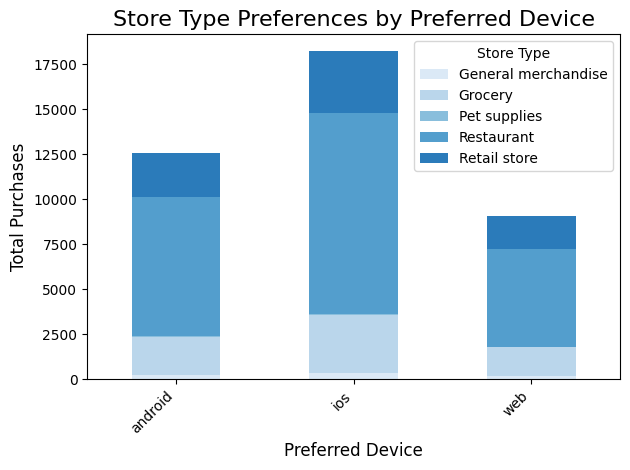


Store Type Preferences by Preferred Device:
                  General merchandise  Grocery  Pet supplies  Restaurant  \
PREFERRED_DEVICE                                                           
android                         247.0   2119.0          32.0      7717.0   
ios                             339.0   3256.0          47.0     11130.0   
web                             197.0   1577.0          15.0      5441.0   

                  Retail store  
PREFERRED_DEVICE                
android                 2479.0  
ios                     3476.0  
web                     1849.0  


In [47]:

device_store_preferences = df_combined.groupby('PREFERRED_DEVICE')[store_type_df.columns].sum()

# Define a custom blue color palette
cmap = sns.color_palette("Blues")

plt.figure(figsize=(14, 8))
device_store_preferences.plot(kind='bar', stacked=True, color=cmap)
plt.title('Store Type Preferences by Preferred Device', fontsize=16)
plt.xlabel('Preferred Device', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

print("\nStore Type Preferences by Preferred Device:")
print(device_store_preferences)

# **Daily Usage Summary**

Comparison of Purchases Across Different Times of the Day with the given data ( without late night purchases )

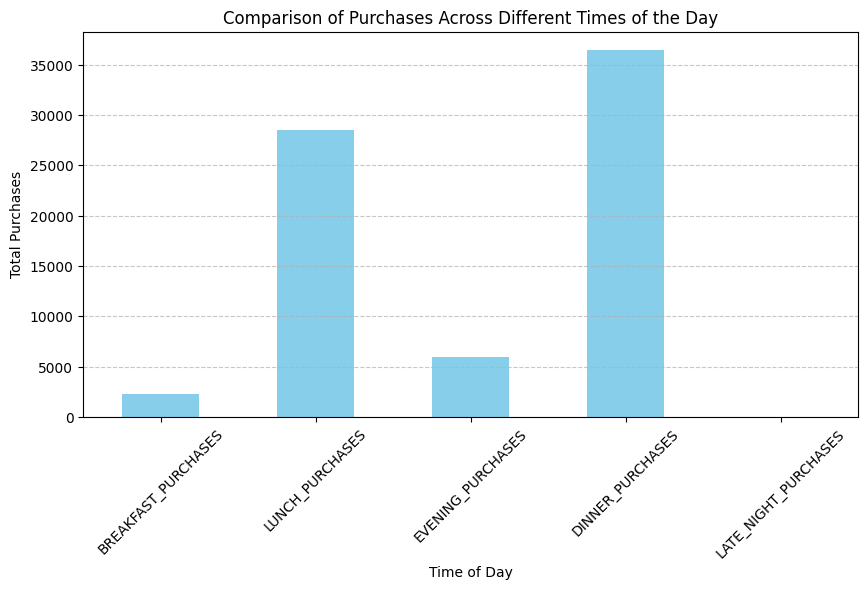

In [15]:
# Summarize total purchases for each time of day
purchase_summary = df_cleaned[['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
                               'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']].sum()

# Plot the bar chart
plt.figure(figsize=(10, 5))
purchase_summary.plot(kind='bar', color=['skyblue'])

# Customize the plot
plt.title("Comparison of Purchases Across Different Times of the Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Comparison of Purchases Across Different Times of the Day with the engineered data for late night purchases

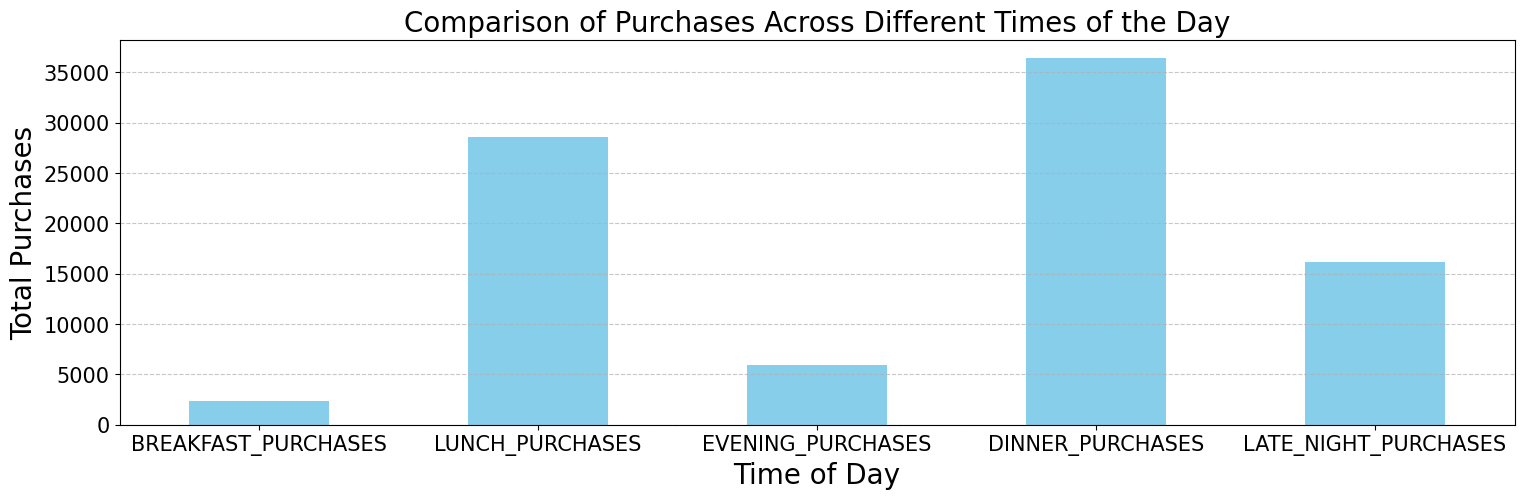

In [16]:
# Summarize total purchases for each time of day
purchase_summary = new_df[['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
                               'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']].sum()

# Plot the bar chart
plt.figure(figsize=(18, 5))
purchase_summary.plot(kind='bar', color=['skyblue'])

# Customize the plot
plt.title("Comparison of Purchases Across Different Times of the Day", fontsize=20)
plt.xlabel("Time of Day", fontsize=20)
plt.ylabel("Total Purchases", fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Looking at this in pie chart with percentages

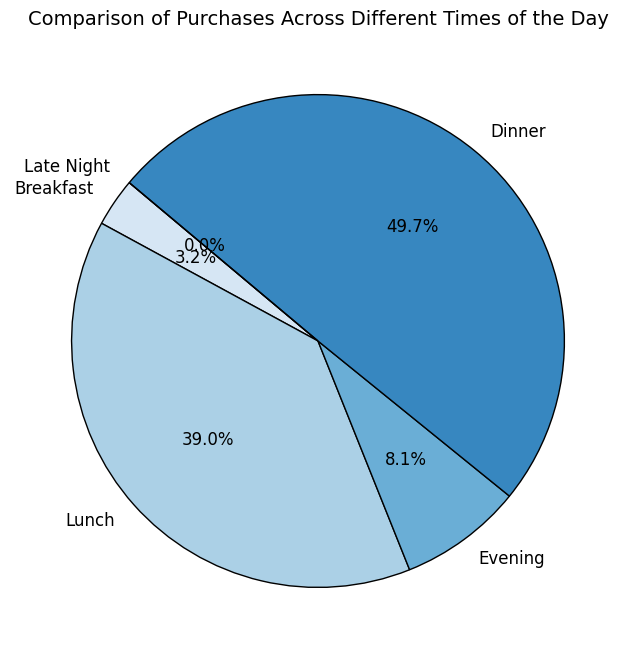

In [19]:
# Summing up purchases across different meal times
time_purchases = df_cleaned[['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
                             'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']].sum()

# Labels and corresponding values
labels = ['Breakfast', 'Lunch', 'Evening', 'Dinner', 'Late Night']
sizes = time_purchases.values  # Extract purchase counts
cmap = sns.color_palette("Blues", n_colors=5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=cmap, startangle=140,
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

# Title
plt.title("Comparison of Purchases Across Different Times of the Day", fontsize=14)

# Show the chart
plt.show()

If we use the updated dataframe with late night purchases

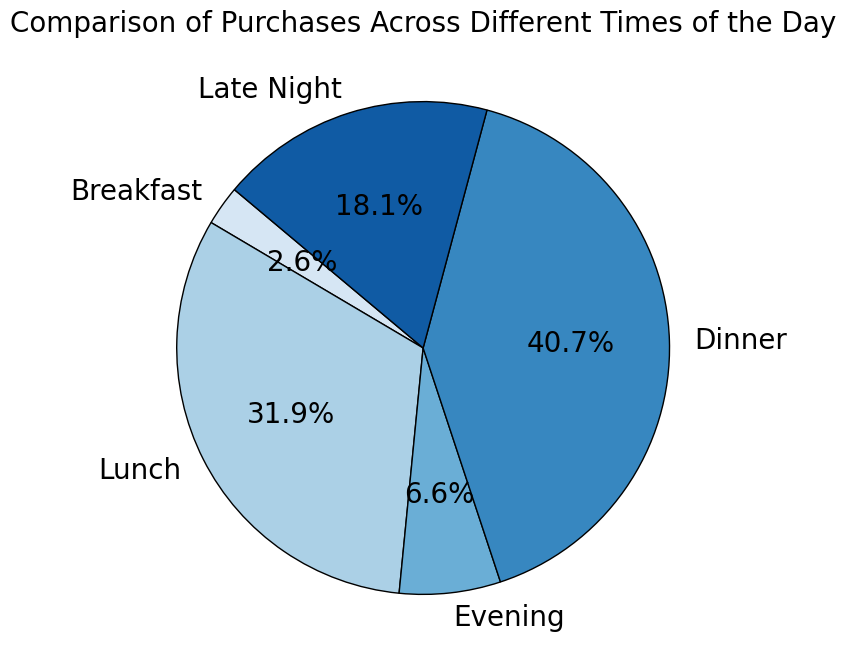

In [75]:
# Summing up purchases across different meal times
time_purchases = new_df[['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
                             'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']].sum()

# Labels and corresponding values
labels = ['Breakfast', 'Lunch', 'Evening', 'Dinner', 'Late Night']
sizes = time_purchases.values  # Extract purchase counts

# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=5)


# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=cmap, startangle=140,
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 20})

# Title
plt.title("Comparison of Purchases Across Different Times of the Day", fontsize=20)

# Show the chart
plt.show()

Purchase Patterns by Country

<Figure size 1200x600 with 0 Axes>

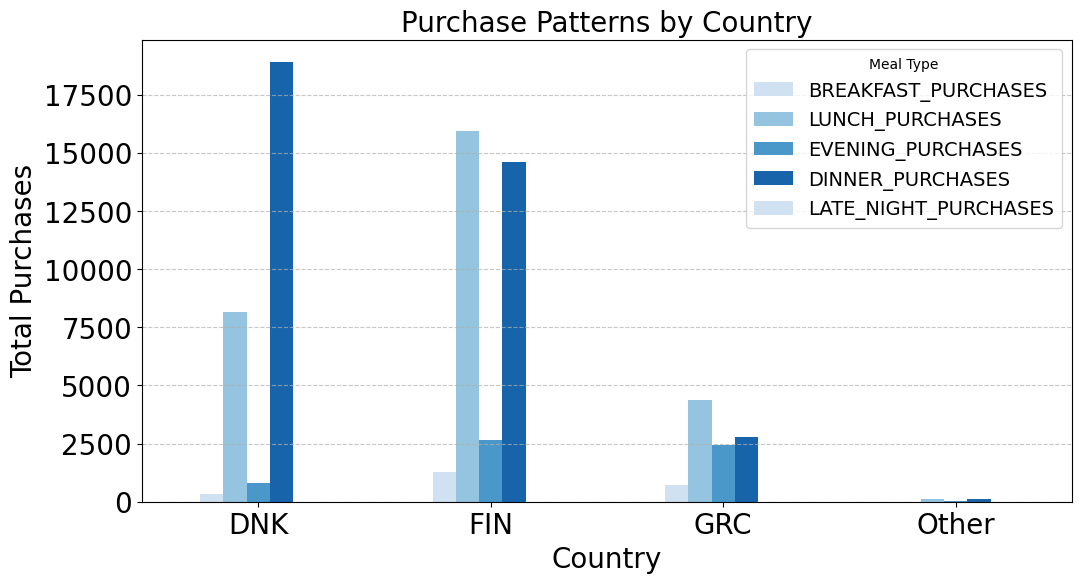

In [124]:
# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=4)
plt.figure(figsize=(12, 6))
df_cleaned.groupby("SIMPLIFIED_COUNTRY")[
    ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']
].sum().plot(kind='bar', figsize=(12, 6), color=cmap)

# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=4)
plt.title("Purchase Patterns by Country", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Total Purchases", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Meal Type", fontsize=14)
plt.show()

With Updated Late night purchases inputs

<Figure size 1200x600 with 0 Axes>

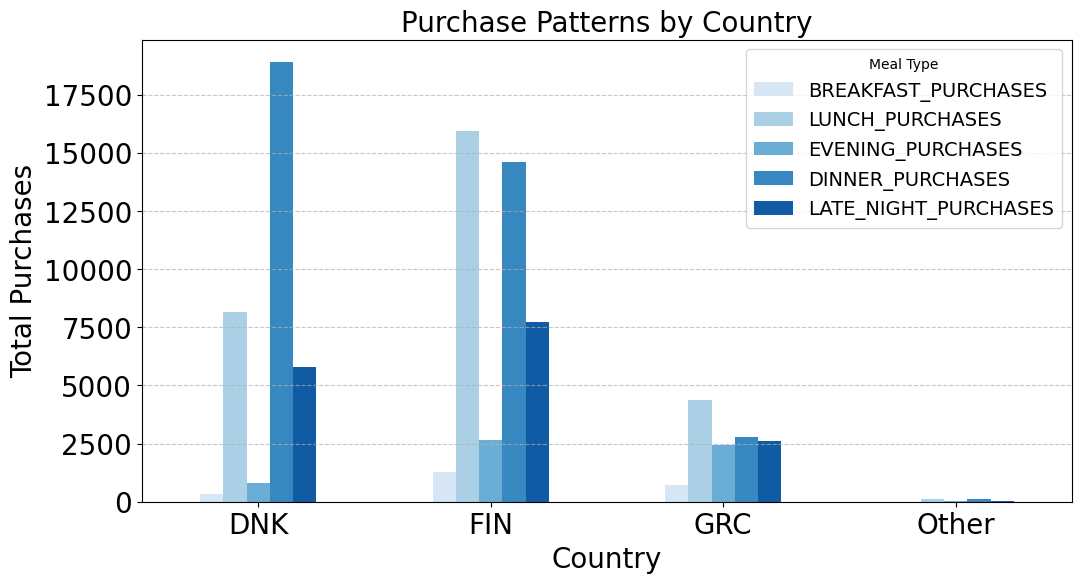

In [77]:
plt.figure(figsize=(12, 6))
new_df_cleaned.groupby("SIMPLIFIED_COUNTRY")[
    ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']
].sum().plot(kind='bar', figsize=(12, 6), color=cmap)

# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=5)
plt.title("Purchase Patterns by Country", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Total Purchases", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Meal Type", fontsize=14)
plt.show()

It can be seen that Denmark users orders more in Dinner while Finland and Greece orders Lunch more

Delivery vs. Takeaway Purchases by Country

<Figure size 1200x600 with 0 Axes>

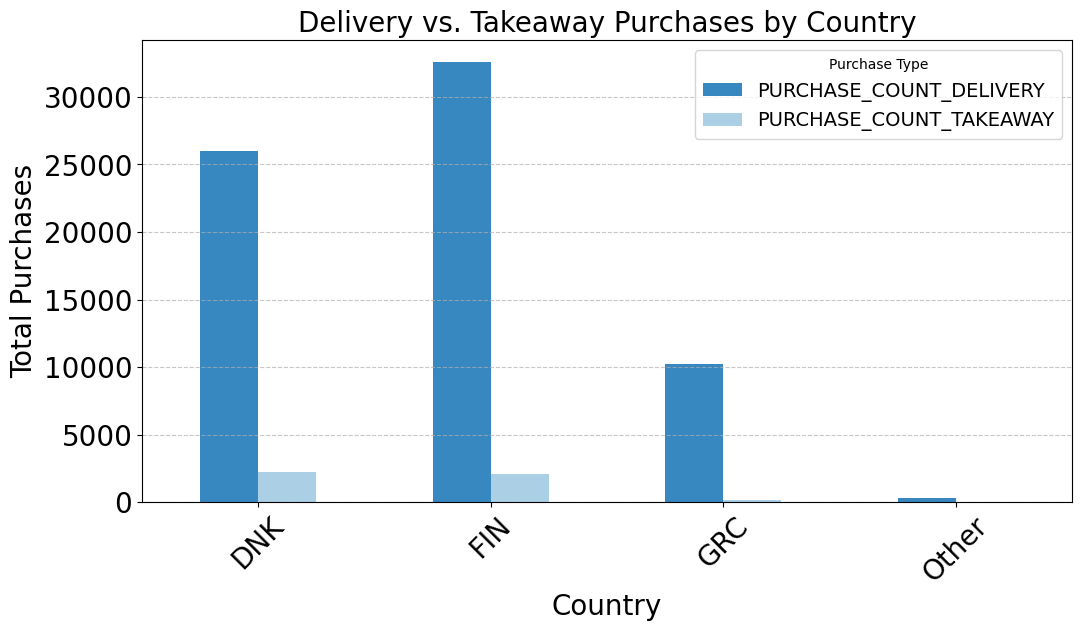

In [38]:
### 1. COUNTRY-WISE DELIVERY VS. TAKEAWAY PREFERENCE ###
# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=2)
plt.figure(figsize=(12, 6))
df_cleaned.groupby("SIMPLIFIED_COUNTRY")[
    ['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY']
].sum().plot(kind='bar', figsize=(12, 6), color=cmap[::-1])


plt.title("Delivery vs. Takeaway Purchases by Country",fontsize=20)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Total Purchases",fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Purchase Type",fontsize=14)
plt.show()

Lets see how delivery purchases dominates in parcentages



In [39]:
# Group data by country and sum delivery/takeaway purchases
country_purchases = df_cleaned.groupby("SIMPLIFIED_COUNTRY")[['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY']].sum()

# Iterate through each country and print the purchase counts and percentages
for country, data in country_purchases.iterrows():
    delivery_count = data['PURCHASE_COUNT_DELIVERY']
    takeaway_count = data['PURCHASE_COUNT_TAKEAWAY']
    total_count = delivery_count + takeaway_count
    delivery_percentage = (delivery_count / total_count) * 100 if total_count > 0 else 0

    print(f"Country: {country}")
    print(f"  Delivery Purchase Count: {delivery_count}")
    print(f"  Takeaway Purchase Count: {takeaway_count}")
    print(f"  Overall Delivery Purchase Percentage: {delivery_percentage:.2f}%")
    print("-" * 20)


Country: DNK
  Delivery Purchase Count: 25996.0
  Takeaway Purchase Count: 2226.0
  Overall Delivery Purchase Percentage: 92.11%
--------------------
Country: FIN
  Delivery Purchase Count: 32569.0
  Takeaway Purchase Count: 2065.0
  Overall Delivery Purchase Percentage: 94.04%
--------------------
Country: GRC
  Delivery Purchase Count: 10218.0
  Takeaway Purchase Count: 162.0
  Overall Delivery Purchase Percentage: 98.44%
--------------------
Country: Other
  Delivery Purchase Count: 278.0
  Takeaway Purchase Count: 27.0
  Overall Delivery Purchase Percentage: 91.15%
--------------------


Looking which country has  how many delivery and how many takeway

In [40]:
# Group data by country and sum 'PURCHASE_COUNT_DELIVERY' and 'PURCHASE_COUNT_TAKEAWAY'
country_purchases = df_cleaned.groupby('REGISTRATION_COUNTRY')[['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY']].sum()

# Iterate through the grouped data and print the results
for country, data in country_purchases.iterrows():
    print(f"Country: {country}")
    print(f"  Purchase Count (Delivery): {data['PURCHASE_COUNT_DELIVERY']}")
    print(f"  Purchase Count (Takeaway): {data['PURCHASE_COUNT_TAKEAWAY']}")


Country: ARE
  Purchase Count (Delivery): 2.0
  Purchase Count (Takeaway): 0.0
Country: CAN
  Purchase Count (Delivery): 5.0
  Purchase Count (Takeaway): 0.0
Country: CYP
  Purchase Count (Delivery): 3.0
  Purchase Count (Takeaway): 0.0
Country: CZE
  Purchase Count (Delivery): 44.0
  Purchase Count (Takeaway): 2.0
Country: DEU
  Purchase Count (Delivery): 2.0
  Purchase Count (Takeaway): 0.0
Country: DNK
  Purchase Count (Delivery): 25996.0
  Purchase Count (Takeaway): 2226.0
Country: EST
  Purchase Count (Delivery): 82.0
  Purchase Count (Takeaway): 3.0
Country: FIN
  Purchase Count (Delivery): 32569.0
  Purchase Count (Takeaway): 2065.0
Country: FRA
  Purchase Count (Delivery): 1.0
  Purchase Count (Takeaway): 2.0
Country: GBR
  Purchase Count (Delivery): 17.0
  Purchase Count (Takeaway): 0.0
Country: GRC
  Purchase Count (Delivery): 10218.0
  Purchase Count (Takeaway): 162.0
Country: HRV
  Purchase Count (Delivery): 6.0
  Purchase Count (Takeaway): 0.0
Country: HUN
  Purchase Count

Delivery Purchases by time of the day to know the peak hour for delivery services

<Figure size 1200x600 with 0 Axes>

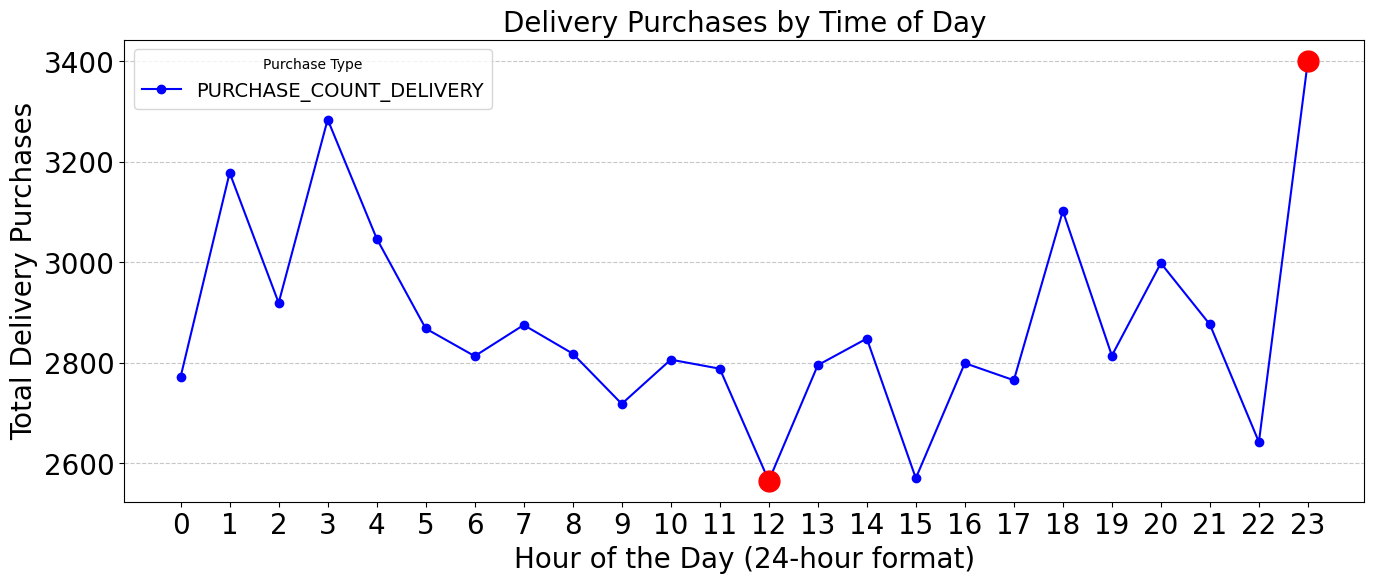

In [18]:
# Delivery Purchases by Time of Day
plt.figure(figsize=(12, 6))
delivery_by_hour = df_cleaned.groupby("MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE")[
    ['PURCHASE_COUNT_DELIVERY']
].sum()
# Plotting the line chart separately
delivery_by_hour.plot(kind='line', marker='o', figsize=(16, 6), color='blue')
plt.title("Delivery Purchases by Time of Day", fontsize=20)
plt.xlabel("Hour of the Day (24-hour format)", fontsize=20)
plt.ylabel("Total Delivery Purchases", fontsize=20)
plt.xticks(range(0, 24, 1), fontsize=20)  # Show all hours
plt.yticks(fontsize=20)
# Get the hour and value of the highest and lowest points
max_hour = delivery_by_hour['PURCHASE_COUNT_DELIVERY'].idxmax()
max_value = delivery_by_hour['PURCHASE_COUNT_DELIVERY'].max()
min_hour = delivery_by_hour['PURCHASE_COUNT_DELIVERY'].idxmin()
min_value = delivery_by_hour['PURCHASE_COUNT_DELIVERY'].min()
# Highlight the highest and lowest points
plt.plot(max_hour, max_value, marker='o', markersize=15, color='red') # Highlight max
plt.plot(min_hour, min_value, marker='o', markersize=15, color='red') # Highlight min
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Purchase Type", fontsize=14)
plt.show()


Takeway Purchases by time of the day to know the peak hour for delivery services

<Figure size 1200x600 with 0 Axes>

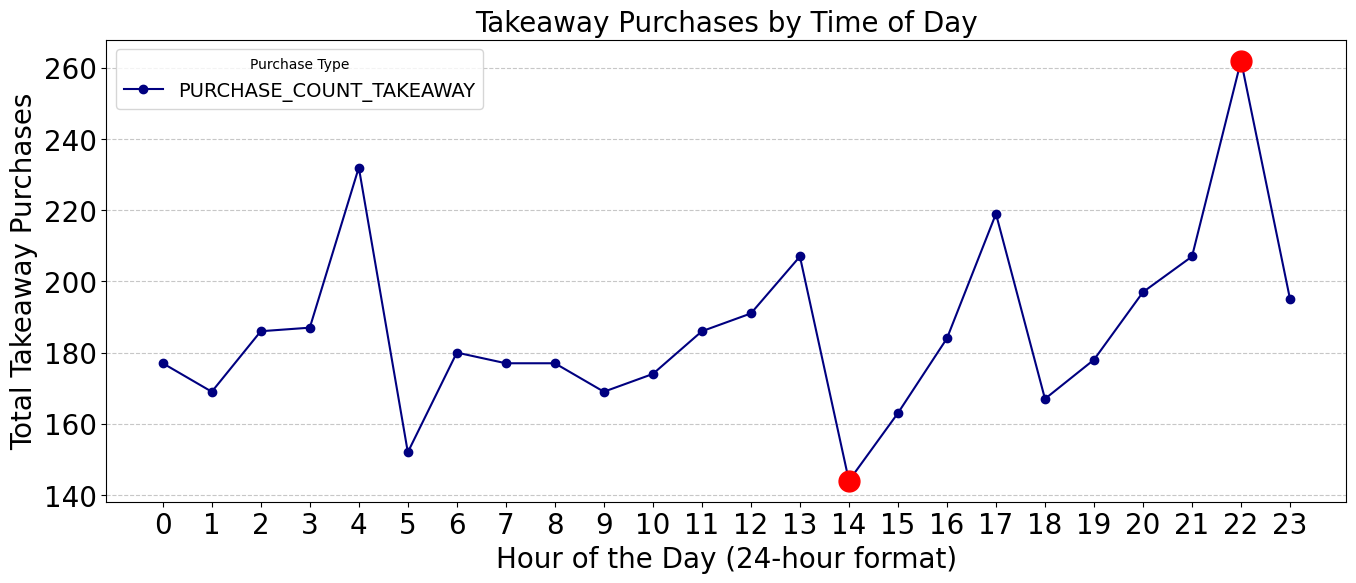

In [17]:
# Takeaway Purchases by Time of Day
plt.figure(figsize=(12, 6))

# Calculate takeaway purchases by hour
takeaway_by_hour = df_cleaned.groupby("MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE")[
    ['PURCHASE_COUNT_TAKEAWAY']
].sum()

# Plot the line chart
takeaway_by_hour.plot(kind='line', marker='o', figsize=(16, 6), color='navy')

plt.title("Takeaway Purchases by Time of Day", fontsize=20)
plt.xlabel("Hour of the Day (24-hour format)", fontsize=20)
plt.ylabel("Total Takeaway Purchases", fontsize=20)
plt.xticks(range(0, 24, 1), fontsize=20)  # Show all hours
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Purchase Type", fontsize=14)

# Get the hour and value of the highest and lowest points
max_hour = takeaway_by_hour['PURCHASE_COUNT_TAKEAWAY'].idxmax()
max_value = takeaway_by_hour['PURCHASE_COUNT_TAKEAWAY'].max()
min_hour = takeaway_by_hour['PURCHASE_COUNT_TAKEAWAY'].idxmin()
min_value = takeaway_by_hour['PURCHASE_COUNT_TAKEAWAY'].min()

# Highlight the highest and lowest points
plt.plot(max_hour, max_value, marker='o', markersize=15, color='red')  # Highlight max
plt.plot(min_hour, min_value, marker='o', markersize=15, color='red')  # Highlight min


plt.show()

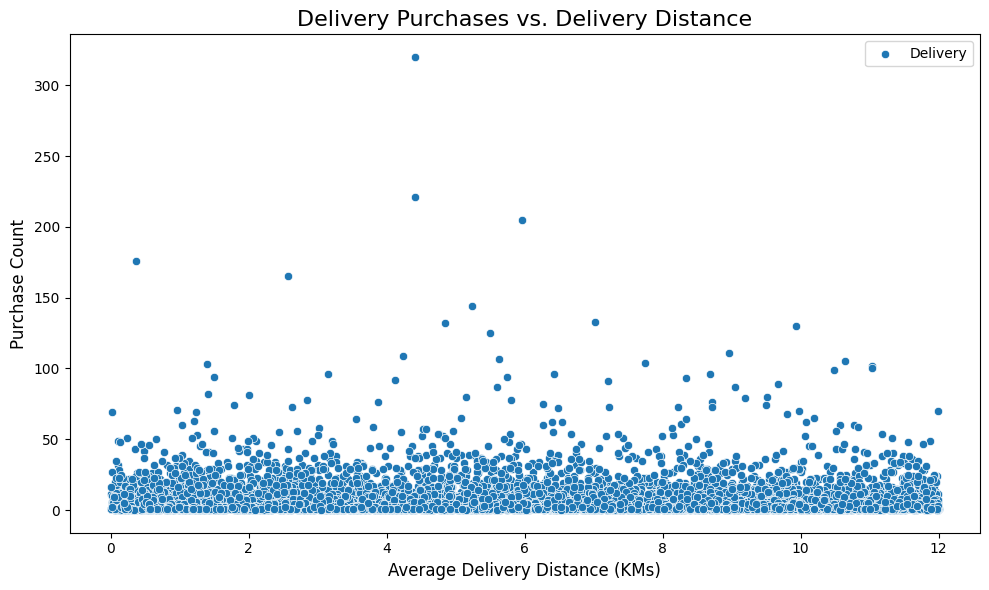

In [24]:
# Delivery Purchase Counts and Delivery Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='PURCHASE_COUNT_DELIVERY', data=df, label='Delivery')
plt.title('Delivery Purchases vs. Delivery Distance', fontsize=16)
plt.xlabel('Average Delivery Distance (KMs)', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

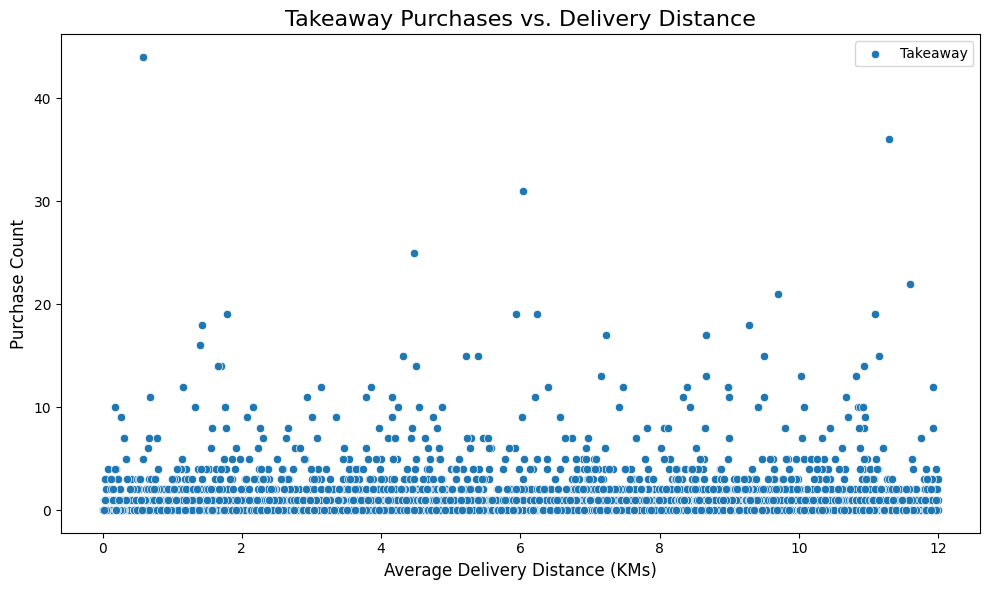

In [23]:
# Takeaway Purchase Counts and Delivery Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='PURCHASE_COUNT_TAKEAWAY', data=df, label='Takeaway')
plt.title('Takeaway Purchases vs. Delivery Distance', fontsize=16)
plt.xlabel('Average Delivery Distance (KMs)', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


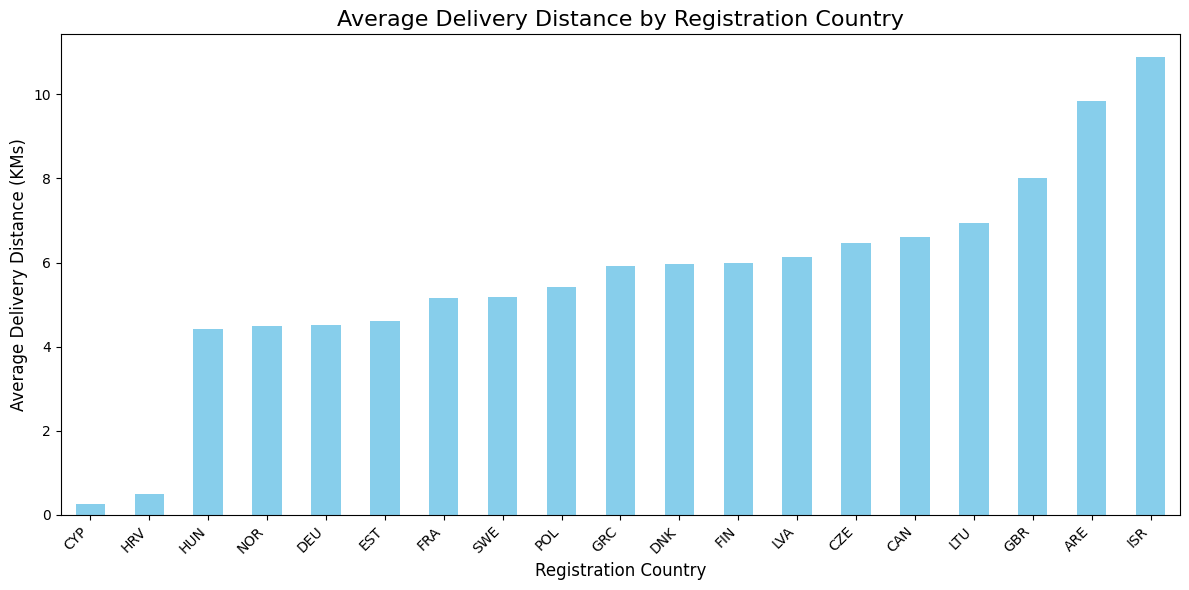

This bar chart helps understand if delivery distances vary significantly by country.


In [25]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby('REGISTRATION_COUNTRY')['AVERAGE_DELIVERY_DISTANCE_KMS'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Delivery Distance by Registration Country', fontsize=16)
plt.xlabel('Registration Country', fontsize=12)
plt.ylabel('Average Delivery Distance (KMs)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("This bar chart helps understand if delivery distances vary significantly by country.")


In [30]:
# Correlation Between Total Purchases and Delivery Distance
correlation = df['PURCHASE_COUNT'].corr(df['AVERAGE_DELIVERY_DISTANCE_KMS'])
print(f"\nCorrelation Between Total Purchases and Delivery Distance: {correlation:.2f}")
print("This value indicates the correlation between total purchases and average delivery distance.")
print(" - The negative correlation means higher purchase counts tend to occur with shorter delivery distances.")


Correlation Between Total Purchases and Delivery Distance: -0.02
This value indicates the correlation between total purchases and average delivery distance.
 - The negative correlation means higher purchase counts tend to occur with shorter delivery distances.


As this is negative, managing to make the distance shorter will increase more purchase counts


Delivery Distance vs. Average Purchase Value to see if longer delivery distances are associated with higher or lower average purchase values.

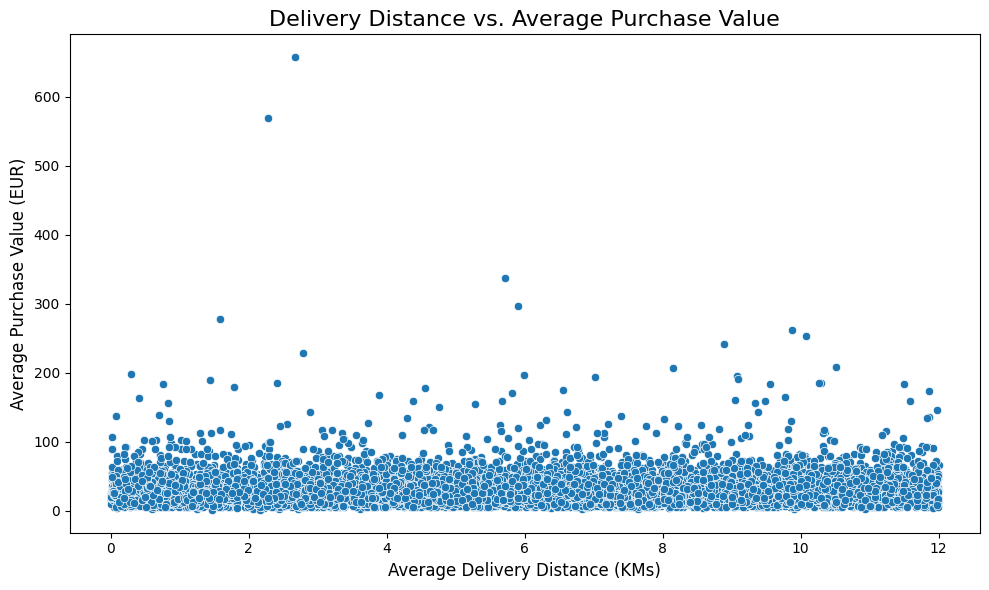

In [28]:
# Delivery Distance vs. Average Purchase Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='AVG_PURCHASE_VALUE_EUR', data=df)
plt.title('Delivery Distance vs. Average Purchase Value', fontsize=16)
plt.xlabel('Average Delivery Distance (KMs)', fontsize=12)
plt.ylabel('Average Purchase Value (EUR)', fontsize=12)
plt.tight_layout()
plt.show()

Delivery Distance by Preferred Device to Investigate whether users on different devices tend to have different delivery distances.

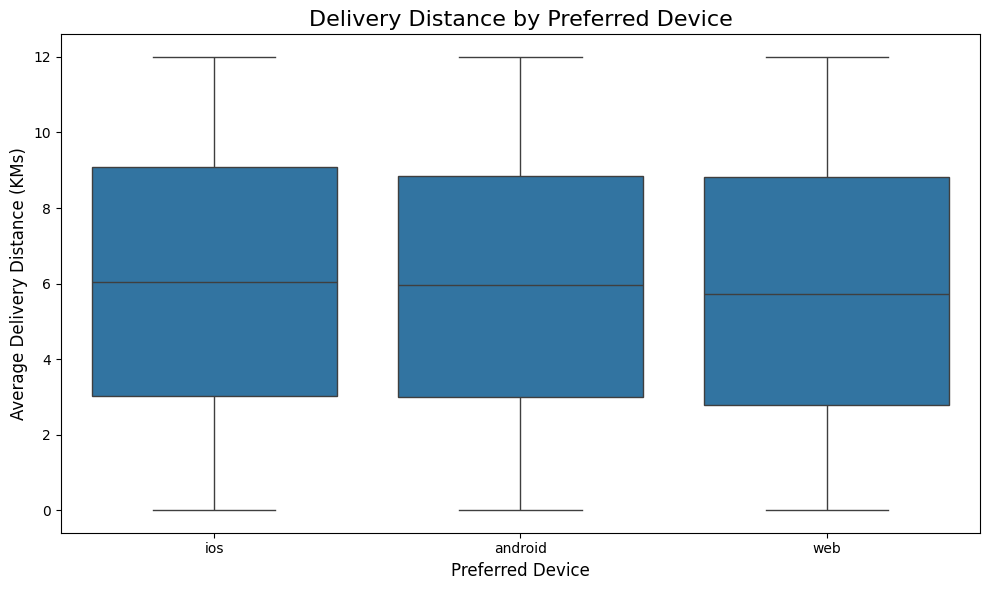

In [27]:
# 5. Preferred Device and Delivery Distance
plt.figure(figsize=(10, 6))
sns.boxplot(x='PREFERRED_DEVICE', y='AVERAGE_DELIVERY_DISTANCE_KMS', data=df)
plt.title('Delivery Distance by Preferred Device', fontsize=16)
plt.xlabel('Preferred Device', fontsize=12)
plt.ylabel('Average Delivery Distance (KMs)', fontsize=12)
plt.tight_layout()
plt.show()

Delivery Distance vs. Valid Payment Method to See if users with valid payment methods have different delivery distances compared to those without

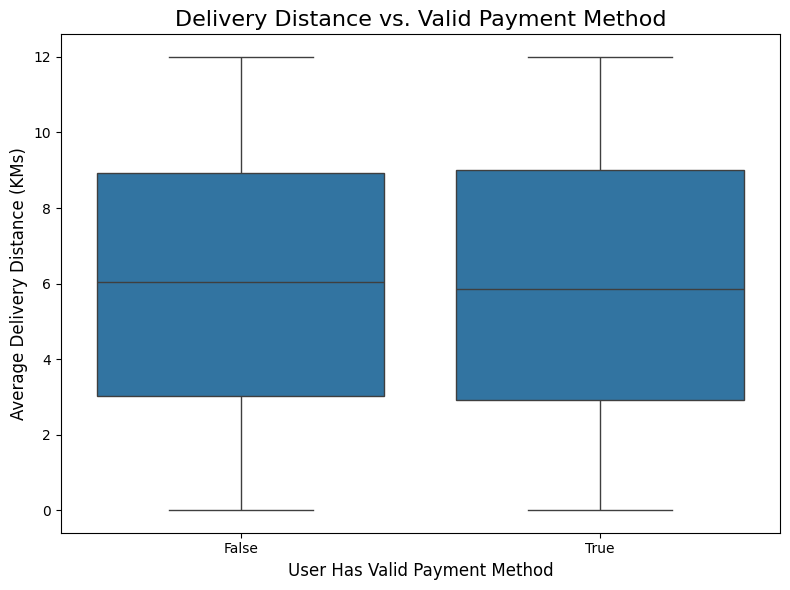

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='USER_HAS_VALID_PAYMENT_METHOD', y='AVERAGE_DELIVERY_DISTANCE_KMS', data=df)
plt.title('Delivery Distance vs. Valid Payment Method', fontsize=16)
plt.xlabel('User Has Valid Payment Method', fontsize=12)
plt.ylabel('Average Delivery Distance (KMs)', fontsize=12)
plt.tight_layout()
plt.show()


# **Preferred Device Usage**

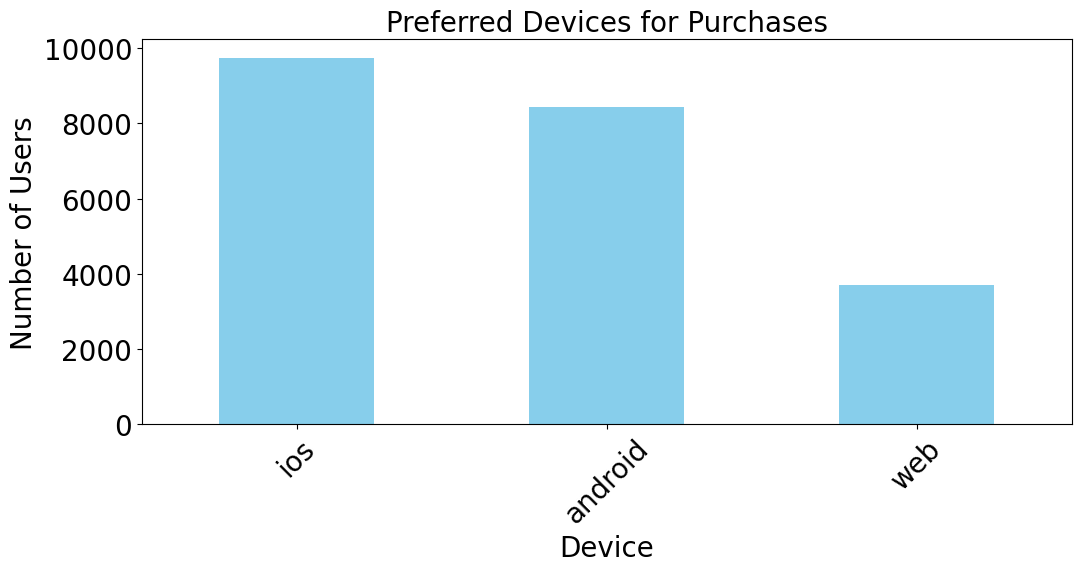

In [10]:
# Device Preferences
device_counts = df['PREFERRED_DEVICE'].value_counts()
device_counts.plot(kind='bar', color='skyblue', figsize=(12, 5), fontsize=20)
plt.title('Preferred Devices for Purchases', fontsize=20)
plt.xlabel('Device', fontsize=20)
plt.ylabel('Number of Users', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.show()

From this chart we can see IOS dominates.

Devices used by active users ( purchase count > 0)

<ipython-input-16-88219291779d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['IS_ACTIVE'] = df_no_nan['PURCHASE_COUNT'].apply(lambda x: 1 if x > 0 else 0)


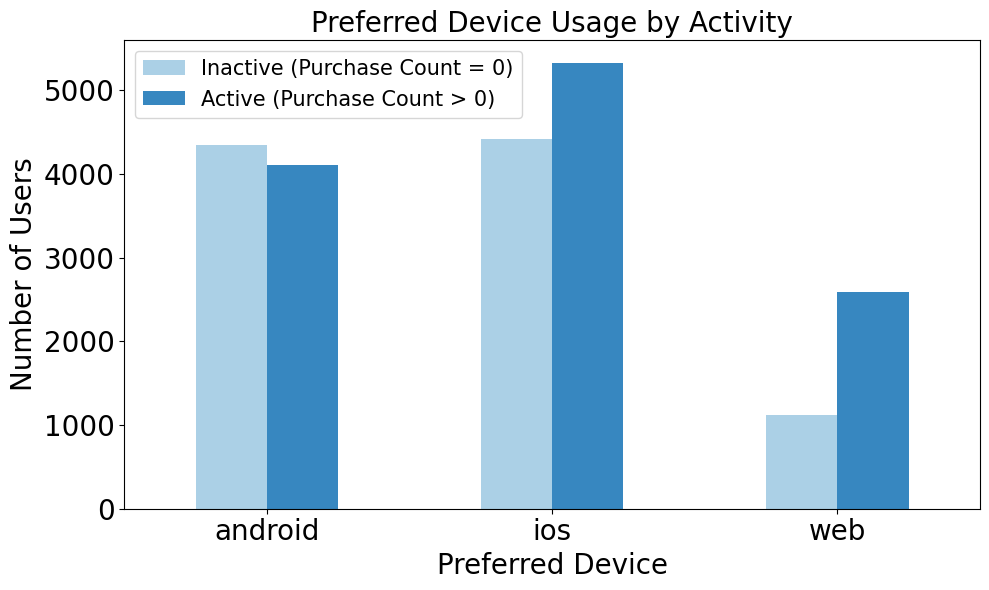

In [16]:
# Remove rows with NaN in 'PREFERRED_DEVICE' column
df_no_nan = df.dropna(subset=['PREFERRED_DEVICE'])

# Create a column to indicate active (1) or inactive (0) users
df_no_nan['IS_ACTIVE'] = df_no_nan['PURCHASE_COUNT'].apply(lambda x: 1 if x > 0 else 0)

# Group data by 'PREFERRED_DEVICE' and 'IS_ACTIVE' and count the occurrences
device_purchase_counts = df_no_nan.groupby(['PREFERRED_DEVICE', 'IS_ACTIVE']).size().unstack()

# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=2)

# Plotting the bar chart
device_purchase_counts.plot(kind='bar', figsize=(10, 6), color=cmap, fontsize=20)
plt.title('Preferred Device Usage by Activity', fontsize=20)
plt.xlabel('Preferred Device', fontsize=20)
plt.ylabel('Number of Users', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.legend(['Inactive (Purchase Count = 0)', 'Active (Purchase Count > 0)'],fontsize=15)
plt.tight_layout()
plt.show()

Lets divide them by country and ses how many active and retained users they have ( retained = purchase count > 1 )

Combined User Status and Device Preference by Country:
                      Total  Active  Retained  Inactive     android  \
REGISTRATION_COUNTRY                                                  
ARE                       6       1         1         5   33.333333   
AUS                      11       0         0        11   18.181818   
AUT                       5       0         0         5   20.000000   
AZE                       2       0         0         2         NaN   
BEL                      11       0         0        11   45.454545   
BRA                       6       0         0         6   50.000000   
CAN                       5       1         1         4         NaN   
CHE                       4       0         0         4   75.000000   
CHL                       2       0         0         2  100.000000   
CHN                       3       0         0         3   66.666667   
COL                       2       0         0         2   50.000000   
CYP                   

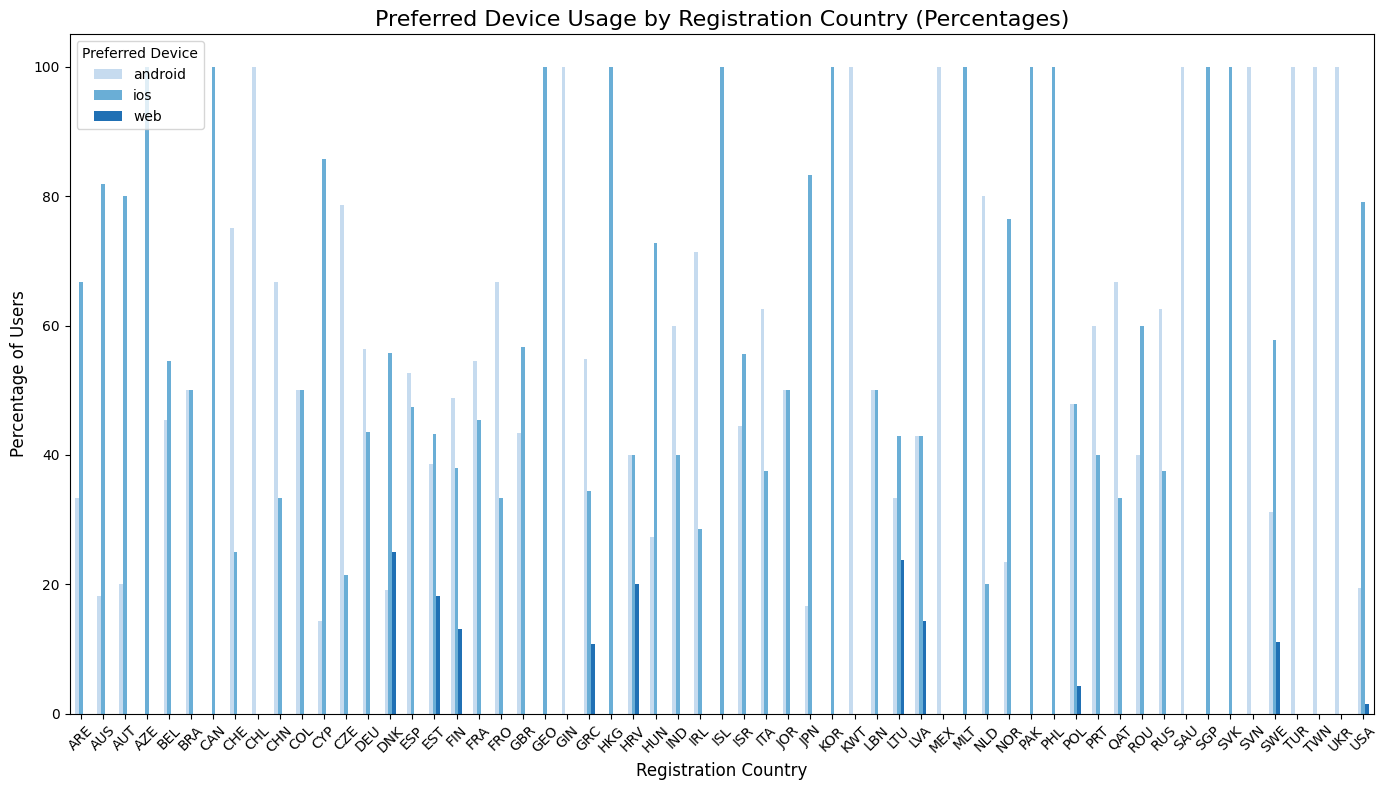

In [12]:
# Ensure 'PREFERRED_DEVICE' is not NaN
df_no_nan = df.dropna(subset=['PREFERRED_DEVICE']).copy()

# Define function to get user activity
def is_active(count):
    return count > 0

# Create active column
df_no_nan['IS_ACTIVE'] = df_no_nan['PURCHASE_COUNT'].apply(is_active)

# Calculate preferred device usage for active users
most_active_device = df_no_nan[df_no_nan['IS_ACTIVE'] == True].groupby('REGISTRATION_COUNTRY')['PREFERRED_DEVICE'].agg(
    lambda x: x.value_counts().index[0] if not x.empty else None)

# Calculate least preferred device usage for active users
least_active_device = df_no_nan[df_no_nan['IS_ACTIVE'] == True].groupby('REGISTRATION_COUNTRY')['PREFERRED_DEVICE'].agg(
    lambda x: x.value_counts().index[-1] if not x.empty else None)

# Group by REGISTRATION_COUNTRY and count active, inactive, and retained users
country_user_status = df_no_nan.groupby('REGISTRATION_COUNTRY').agg(
    Total=('USER_ID', 'count'),
    Active=('IS_ACTIVE', 'sum'),
    Retained=('PURCHASE_COUNT', lambda x: (x > 1).sum())  # Corrected Retained calculation
)

# Calculate inactive users
country_user_status['Inactive'] = country_user_status['Total'] - country_user_status['Active']

# Group data by 'REGISTRATION_COUNTRY' and 'PREFERRED_DEVICE' and count the occurrences
country_device_counts = df_no_nan.groupby(['REGISTRATION_COUNTRY', 'PREFERRED_DEVICE']).size().unstack()

# Calculate percentages
country_device_percentages = country_device_counts.div(country_device_counts.sum(axis=1), axis=0) * 100

# Merge the tables
output_table = pd.concat([country_user_status, country_device_percentages], axis=1)

# Create the new table with preferred devices
device_table = pd.DataFrame({
    'Most Active Device': most_active_device,
    'Least Active Device': least_active_device
})

# Print the existing table
print("Combined User Status and Device Preference by Country:")
print(output_table)

# Print the new device table
print("\nDevice Activity Table:")
print(device_table)

# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=3)

# Plotting the bar chart
country_device_percentages.plot(kind='bar', figsize=(14, 8), color=cmap)
plt.title('Preferred Device Usage by Registration Country (Percentages)', fontsize=16)
plt.xlabel('Registration Country', fontsize=12)
plt.ylabel('Percentage of Users', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Preferred Device')
plt.tight_layout()
plt.show()

Lets make this simplified by grouping the lest active users

Combined User Status and Device Preference by Country:
                    Total  Active  Retained  Inactive    android        ios  \
SIMPLIFIED_COUNTRY                                                            
DNK                  8060    4985      3265      3075  19.193548  55.744417   
FIN                 10244    5450      3582      4794  48.848106  37.992971   
GRC                  3032    1532       958      1500  54.782322  34.498681   
Other                 574      60        44       514  41.114983  55.052265   

                          web  
SIMPLIFIED_COUNTRY             
DNK                 25.062035  
FIN                 13.158922  
GRC                 10.718997  
Other                3.832753  

Device Activity Table:
                   Most Active Device Least Active Device
SIMPLIFIED_COUNTRY                                       
DNK                               ios             android
FIN                           android                 web
GRC                   

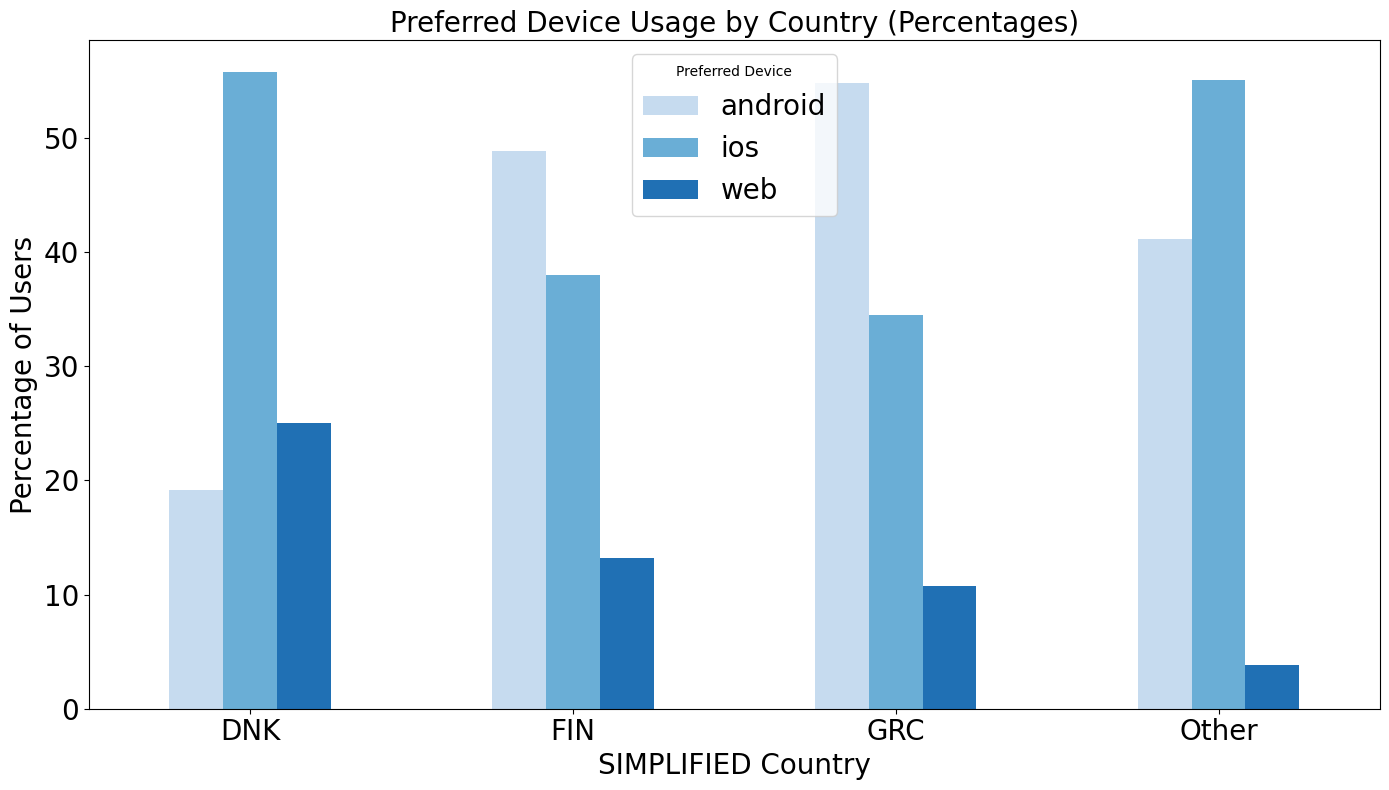

In [13]:
# Ensure 'PREFERRED_DEVICE' is not NaN
df_no_nan = df.dropna(subset=['PREFERRED_DEVICE']).copy()

# Define function to get user activity
def is_active(count):
    return count > 0

# Create active column
df_no_nan['IS_ACTIVE'] = df_no_nan['PURCHASE_COUNT'].apply(is_active)

# Calculate preferred device usage for active users
most_active_device = df_no_nan[df_no_nan['IS_ACTIVE'] == True].groupby('SIMPLIFIED_COUNTRY')['PREFERRED_DEVICE'].agg(
    lambda x: x.value_counts().index[0] if not x.empty else None)

# Calculate least preferred device usage for active users
least_active_device = df_no_nan[df_no_nan['IS_ACTIVE'] == True].groupby('SIMPLIFIED_COUNTRY')['PREFERRED_DEVICE'].agg(
    lambda x: x.value_counts().index[-1] if not x.empty else None)

# Group by SIMPLIFIED_COUNTRY and count active, inactive, and retained users
country_user_status = df_no_nan.groupby('SIMPLIFIED_COUNTRY').agg(
    Total=('USER_ID', 'count'),
    Active=('IS_ACTIVE', 'sum'),
    Retained=('PURCHASE_COUNT', lambda x: (x > 1).sum())  # Corrected Retained calculation
)

# Calculate inactive users
country_user_status['Inactive'] = country_user_status['Total'] - country_user_status['Active']

# Group data by 'SIMPLIFIED_COUNTRY' and 'PREFERRED_DEVICE' and count the occurrences
country_device_counts = df_no_nan.groupby(['SIMPLIFIED_COUNTRY', 'PREFERRED_DEVICE']).size().unstack()

# Calculate percentages
country_device_percentages = country_device_counts.div(country_device_counts.sum(axis=1), axis=0) * 100

# Merge the tables
output_table = pd.concat([country_user_status, country_device_percentages], axis=1)

# Create the new table with preferred devices
device_table = pd.DataFrame({
    'Most Active Device': most_active_device,
    'Least Active Device': least_active_device
})

# Print the existing table
print("Combined User Status and Device Preference by Country:")
print(output_table)

# Print the new device table
print("\nDevice Activity Table:")
print(device_table)

# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=3)

# Plotting the bar chart
country_device_percentages.plot(kind='bar', figsize=(14, 8) , color=cmap)
plt.title('Preferred Device Usage by Country (Percentages)', fontsize=20)
plt.xlabel('SIMPLIFIED Country', fontsize=20)
plt.ylabel('Percentage of Users', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Preferred Device', loc='upper center', fontsize=20)
plt.tight_layout()
plt.show()

From this we can have an understanding of countries to target in which devices, with its language and other campains

Lets see the Conversion Rate by selecting the threshold as 40

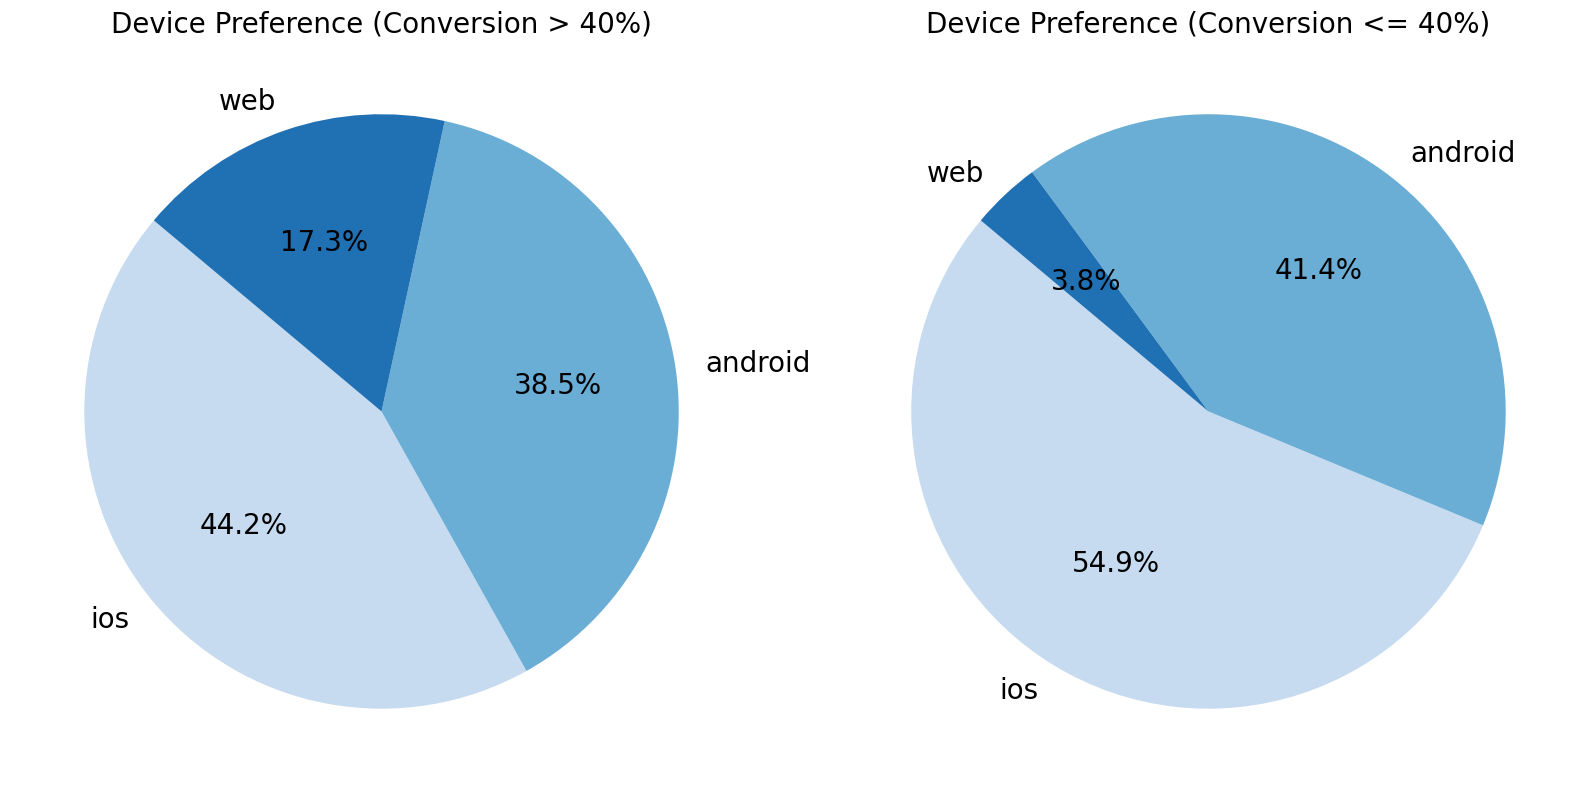


High Conversion Countries Device Preference:
PREFERRED_DEVICE
ios        44.216540
android    38.484593
web        17.298867
Name: proportion, dtype: float64

Low Conversion Countries Device Preference:
PREFERRED_DEVICE
ios        54.856115
android    41.366906
web         3.776978
Name: proportion, dtype: float64


In [14]:
# Calculate the total number of users per country
total_users_by_country = df_no_nan['REGISTRATION_COUNTRY'].value_counts()

# Calculate the number of users with purchase_count > 0 per country
active_users_by_country = df_no_nan[df_no_nan['PURCHASE_COUNT'] > 0]['REGISTRATION_COUNTRY'].value_counts()

# Calculate the conversion rate per country
conversion_rate_by_country = (active_users_by_country / total_users_by_country).fillna(0) * 100

# Define conversion rate threshold
conversion_threshold = 40

# Group countries based on conversion rate
high_conversion_countries = conversion_rate_by_country[conversion_rate_by_country > conversion_threshold].index
low_conversion_countries = conversion_rate_by_country[conversion_rate_by_country <= conversion_threshold].index

# Filter the original dataframe for high and low conversion countries
high_conversion_df = df_no_nan[df_no_nan['REGISTRATION_COUNTRY'].isin(high_conversion_countries)]
low_conversion_df = df_no_nan[df_no_nan['REGISTRATION_COUNTRY'].isin(low_conversion_countries)]

# Analyze preferred device usage for high conversion countries
high_conversion_device_usage = high_conversion_df['PREFERRED_DEVICE'].value_counts(normalize=True) * 100

# Analyze preferred device usage for low conversion countries
low_conversion_device_usage = low_conversion_df['PREFERRED_DEVICE'].value_counts(normalize=True) * 100

# Define a custom blue color palette
cmap = sns.color_palette("Blues", n_colors=3)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plotting for high conversion countries
axes[0].pie(high_conversion_device_usage, labels=high_conversion_device_usage.index, autopct='%1.1f%%', startangle=140, colors=cmap, textprops={'fontsize': 20})
axes[0].set_title(f'Device Preference (Conversion > {conversion_threshold}%)', fontsize=20)

# Plotting for low conversion countries
axes[1].pie(low_conversion_device_usage, labels=low_conversion_device_usage.index, autopct='%1.1f%%', startangle=140, colors=cmap, textprops={'fontsize': 20})
axes[1].set_title(f'Device Preference (Conversion <= {conversion_threshold}%)', fontsize=20)

plt.tight_layout()
plt.show()

# Print the percentages
print("\nHigh Conversion Countries Device Preference:")
print(high_conversion_device_usage)

print("\nLow Conversion Countries Device Preference:")
print(low_conversion_device_usage)

In [44]:
# Group by device and sum total purchases
device_spending = df_cleaned.groupby('PREFERRED_DEVICE')['TOTAL_PURCHASES_EUR'].sum()
print(device_spending)

# Find the device with the highest total spending
highest_spending_device = device_spending.idxmax()
print(f"\nThe device with the highest total spending is: {highest_spending_device}")


PREFERRED_DEVICE
android    646563.764
ios        932438.584
web        540433.300
Name: TOTAL_PURCHASES_EUR, dtype: float64

The device with the highest total spending is: ios


The device with the highest total purchases is: ios
Total purchases: 932438.584 EUR


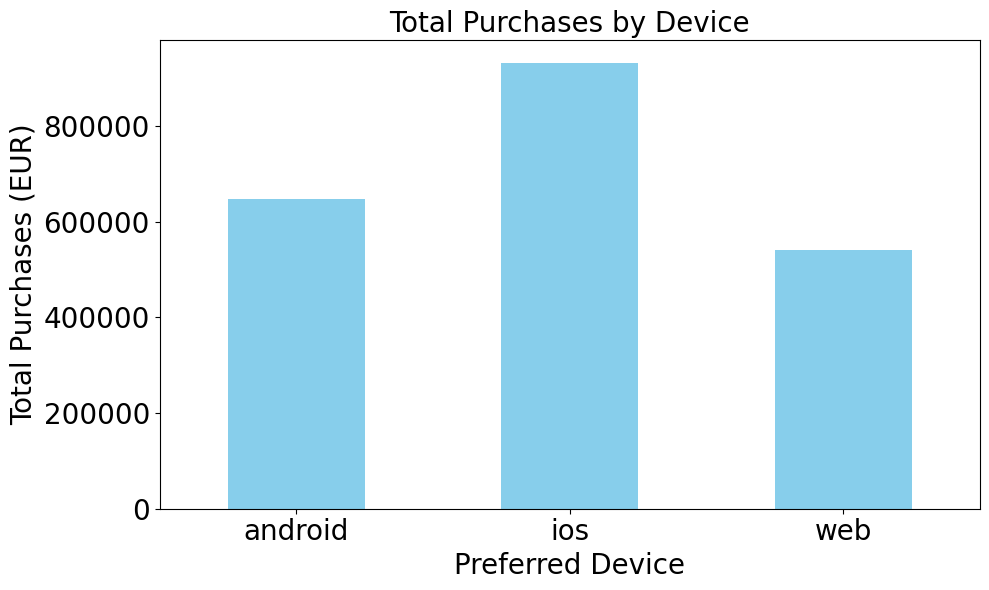

In [46]:
# Find the device with the highest total purchases
highest_spending_device = device_spending.idxmax()
highest_spending_amount = device_spending.max()

print(f"The device with the highest total purchases is: {highest_spending_device}")
print(f"Total purchases: {highest_spending_amount} EUR")

# Create the bar chart
plt.figure(figsize=(10, 6))
device_spending.plot(kind='bar', color='skyblue')
plt.title('Total Purchases by Device', fontsize=20)
plt.xlabel('Preferred Device', fontsize=20)
plt.ylabel('Total Purchases (EUR)', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


In [58]:
# Ensure 'PREFERRED_DEVICE' is not NaN
df_no_nan = df.dropna(subset=['PREFERRED_DEVICE']).copy()

# Define function to get user activity
def is_active(count):
    return count > 0

# Create active column
df_no_nan['IS_ACTIVE'] = df_no_nan['PURCHASE_COUNT'].apply(is_active)

# Calculate active device percentages
def calculate_active_device_percentages(group):
    total_ios = group['PREFERRED_DEVICE'].value_counts().get('ios', 0)
    total_android = group['PREFERRED_DEVICE'].value_counts().get('android', 0)
    total_web = group['PREFERRED_DEVICE'].value_counts().get('web', 0)

    active_ios = group[(group['IS_ACTIVE'] == True) & (group['PREFERRED_DEVICE'] == 'ios')].shape[0]
    active_android = group[(group['IS_ACTIVE'] == True) & (group['PREFERRED_DEVICE'] == 'android')].shape[0]
    active_web = group[(group['IS_ACTIVE'] == True) & (group['PREFERRED_DEVICE'] == 'web')].shape[0]

    ios_percentage = (active_ios / total_ios) * 100 if total_ios > 0 else 0
    android_percentage = (active_android / total_android) * 100 if total_android > 0 else 0
    web_percentage = (active_web / total_web) * 100 if total_web > 0 else 0

    return pd.Series({'Active IOS %': ios_percentage, 'Active Android %': android_percentage, 'Active Web %': web_percentage})

# Group by SIMPLIFIED_COUNTRY and apply the function
device_activity_percentages = df_no_nan.groupby('SIMPLIFIED_COUNTRY').apply(calculate_active_device_percentages)

# Print the device table
print("\nDevice Activity Table:")
print(device_activity_percentages)


Device Activity Table:
                    Active IOS %  Active Android %  Active Web %
SIMPLIFIED_COUNTRY                                              
DNK                    59.893167         53.393665     72.673267
FIN                    53.083248         49.660272     66.691395
GRC                    51.338432         46.779049     67.076923
Other                  10.759494          8.474576     27.272727


<ipython-input-58-dbe35c687063>:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  device_activity_percentages = df_no_nan.groupby('SIMPLIFIED_COUNTRY').apply(calculate_active_device_percentages)



**Android Improvement:** Finland has the most Wolt users in which 49% are android users, from which more than 50% of Android users are inactive. Improving Android app performance could boost engagement and purchases, as Android has more inactive users than active users. <br>

**iOS Experience:** In low-conversion countries, iOS preference is high (54.9%). Investigating potential issues in this regions may help increase conversions.<br>

**Web Platform:** High-conversion countries have more web users (17.3%) vs. low-conversion ones (3.8%). Enhancing the web platform could attract more users globally.
